**Created on:** Nov 17 2024, 15:19:08  
**Author:** Amoy Ashesh

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import astropy
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.table import Table

# Loading the raw dataset

In [ ]:
hdul = fits.open('1725606664466O-result.fits')
data = hdul[1].data
df = pd.DataFrame(data)
dt = df.copy()
dt['target'] = 0   

In [146]:
dt.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,target
0,1636042515805110273,Gaia EDR3 4282338889562080256,4282338889562080256,1676903215,2016.0,282.797128,0.320962,5.664817,0.300519,1.942654,...,NaN,0,NaN,NaN,NaN,37.948743,2.635009,284.520151,28.461329,0
1,1636042515805110273,Gaia EDR3 4282338996943174400,4282338996943174400,286134733,2016.0,282.805203,0.012707,5.668919,0.012036,1.385682,...,NaN,0,NaN,NaN,NaN,37.956055,2.629712,284.529714,28.464605,0
2,1636042515805110273,Gaia EDR3 4282339027001101312,4282339027001101312,1784922414,2016.0,282.822579,0.293851,5.685145,0.267899,2.057582,...,NaN,0,NaN,NaN,NaN,37.978387,2.621676,284.551137,28.479013,0
3,1636042515805110273,Gaia EDR3 4282339065662679552,4282339065662679552,597131460,2016.0,282.793744,0.035208,5.679938,0.034174,1.814708,...,NaN,0,NaN,NaN,NaN,37.960699,2.644876,284.518064,28.476712,0
4,1636042515805110273,Gaia EDR3 4282339095720590720,4282339095720590720,1271845445,2016.0,282.808858,0.286069,5.688740,0.242148,3.129726,...,NaN,0,NaN,NaN,NaN,37.975386,2.635474,284.536092,28.483961,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 99 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   solution_id                      500000 non-null  int64  
 1   designation                      500000 non-null  object 
 2   source_id                        500000 non-null  int64  
 3   random_index                     500000 non-null  int64  
 4   ref_epoch                        500000 non-null  float64
 5   ra                               500000 non-null  float64
 6   ra_error                         500000 non-null  float32
 7   dec                              500000 non-null  float64
 8   dec_error                        500000 non-null  float32
 9   parallax                         500000 non-null  float64
 10  parallax_error                   500000 non-null  float32
 11  parallax_over_error              500000 non-null  float32
 12  pm

# Loading the catalogue

In [116]:
hdul1 = fits.open('binary_catalog.fits')
data1 = hdul1[1].data
df1 = pd.DataFrame(data1)

In [117]:
df1.drop(columns=['solution_id1','solution_id2'], inplace=True)

In [118]:
len(df1['designation1'])

2668

In [119]:
len(df['designation'])

500000

In [120]:
df1.head()

,designation1,designation2,source_id1,source_id2,random_index1,random_index2,ref_epoch1,ref_epoch2,ra1,ra2,...,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type
0,Gaia EDR3 4089479022488044288,Gaia EDR3 4089479228603718016,4089479022488044288,4089479228603718016,908904198,616511068,2016.0,2016.0,276.689134,276.686031,...,9.669814,-5.199889,-5.181942,276.152316,276.151019,0.231443,0.265118,0.033700,29157.874130,MSMS
1,Gaia EDR3 4089398620737369088,Gaia EDR3 4089397757512204672,4089398620737369088,4089397757512204672,1629032774,1064802061,2016.0,2016.0,275.440174,275.359528,...,8.589557,-4.426596,-4.369445,274.984306,274.909793,-0.247530,-0.262487,0.075998,79160.521812,MS??
2,Gaia EDR3 4282156542430008576,Gaia EDR3 4282156546736543232,4282156542430008576,4282156546736543232,44746678,725518649,2016.0,2016.0,281.655078,281.655580,...,36.568503,3.208771,3.208777,283.132685,283.133349,27.605410,27.606356,0.001114,601.485454,MSMS
3,Gaia EDR3 4282175994356557568,Gaia EDR3 4282156679869051904,4282175994356557568,4282156679869051904,184989516,1300860338,2016.0,2016.0,281.609897,281.619018,...,36.561192,3.307368,3.245949,283.095236,283.093453,27.737868,27.619969,0.117909,152221.404738,MSMS
4,Gaia EDR3 4281938774703993728,Gaia EDR3 4281940557112176128,4281938774703993728,4281940557112176128,486504483,659077160,2016.0,2016.0,283.433822,283.429482,...,37.004314,1.425185,1.445556,285.069684,285.069073,26.986210,27.022726,0.036520,78347.192119,MSMS


In [124]:
df1.columns.to_list()

['designation1',
 'designation2',
 'source_id1',
 'source_id2',
 'random_index1',
 'random_index2',
 'ref_epoch1',
 'ref_epoch2',
 'ra1',
 'ra2',
 'ra_error1',
 'ra_error2',
 'dec1',
 'dec2',
 'dec_error1',
 'dec_error2',
 'parallax1',
 'parallax2',
 'parallax_error1',
 'parallax_error2',
 'parallax_over_error1',
 'parallax_over_error2',
 'pm1',
 'pm2',
 'pmra1',
 'pmra2',
 'pmra_error1',
 'pmra_error2',
 'pmdec1',
 'pmdec2',
 'pmdec_error1',
 'pmdec_error2',
 'ra_dec_corr1',
 'ra_dec_corr2',
 'ra_parallax_corr1',
 'ra_parallax_corr2',
 'ra_pmra_corr1',
 'ra_pmra_corr2',
 'ra_pmdec_corr1',
 'ra_pmdec_corr2',
 'dec_parallax_corr1',
 'dec_parallax_corr2',
 'dec_pmra_corr1',
 'dec_pmra_corr2',
 'dec_pmdec_corr1',
 'dec_pmdec_corr2',
 'parallax_pmra_corr1',
 'parallax_pmra_corr2',
 'parallax_pmdec_corr1',
 'parallax_pmdec_corr2',
 'pmra_pmdec_corr1',
 'pmra_pmdec_corr2',
 'astrometric_n_obs_al1',
 'astrometric_n_obs_al2',
 'astrometric_n_obs_ac1',
 'astrometric_n_obs_ac2',
 'astrometric_n_

# Binary Classification

## Marking WBS

In [149]:
source_ids_set = set(df1['source_id1']).union(set(df1['source_id2']))

dt['target'] = dt['source_id'].isin(source_ids_set).astype(int)

In [150]:
dt.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,target
0,1636042515805110273,Gaia EDR3 4282338889562080256,4282338889562080256,1676903215,2016.0,282.797128,0.320962,5.664817,0.300519,1.942654,...,NaN,0,NaN,NaN,NaN,37.948743,2.635009,284.520151,28.461329,0
1,1636042515805110273,Gaia EDR3 4282338996943174400,4282338996943174400,286134733,2016.0,282.805203,0.012707,5.668919,0.012036,1.385682,...,NaN,0,NaN,NaN,NaN,37.956055,2.629712,284.529714,28.464605,0
2,1636042515805110273,Gaia EDR3 4282339027001101312,4282339027001101312,1784922414,2016.0,282.822579,0.293851,5.685145,0.267899,2.057582,...,NaN,0,NaN,NaN,NaN,37.978387,2.621676,284.551137,28.479013,0
3,1636042515805110273,Gaia EDR3 4282339065662679552,4282339065662679552,597131460,2016.0,282.793744,0.035208,5.679938,0.034174,1.814708,...,NaN,0,NaN,NaN,NaN,37.960699,2.644876,284.518064,28.476712,0
4,1636042515805110273,Gaia EDR3 4282339095720590720,4282339095720590720,1271845445,2016.0,282.808858,0.286069,5.688740,0.242148,3.129726,...,NaN,0,NaN,NaN,NaN,37.975386,2.635474,284.536092,28.483961,0


In [151]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 100 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   solution_id                      500000 non-null  int64  
 1   designation                      500000 non-null  object 
 2   source_id                        500000 non-null  int64  
 3   random_index                     500000 non-null  int64  
 4   ref_epoch                        500000 non-null  float64
 5   ra                               500000 non-null  float64
 6   ra_error                         500000 non-null  float32
 7   dec                              500000 non-null  float64
 8   dec_error                        500000 non-null  float32
 9   parallax                         500000 non-null  float64
 10  parallax_error                   500000 non-null  float32
 11  parallax_over_error              500000 non-null  float32
 12  p

In [152]:
dt = dt.dropna(axis=1, how='any')

In [153]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 67 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   solution_id                      500000 non-null  int64  
 1   designation                      500000 non-null  object 
 2   source_id                        500000 non-null  int64  
 3   random_index                     500000 non-null  int64  
 4   ref_epoch                        500000 non-null  float64
 5   ra                               500000 non-null  float64
 6   ra_error                         500000 non-null  float32
 7   dec                              500000 non-null  float64
 8   dec_error                        500000 non-null  float32
 9   parallax                         500000 non-null  float64
 10  parallax_error                   500000 non-null  float32
 11  parallax_over_error              500000 non-null  float32
 12  pm

In [154]:
print(dt.columns)

Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_matched_transits',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'matched_transits', 'new_matched_transits', 'matched_transits_removed',
       'ipd_gof_harmonic_amplitude', 'ipd_gof_harmonic_phase',
       'ipd_frac_m

## Splitting the dataset

In [16]:
from sklearn.model_selection import train_test_split

X = dt.drop(columns=['solution_id', 'designation', 'source_id', 'target'])
y = dt['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
y.value_counts()

0    494664
1      5336
Name: target, dtype: int64

In [18]:
y_train.value_counts()

0    395757
1      4243
Name: target, dtype: int64

In [19]:
y_test.value_counts()

0    98907
1     1093
Name: target, dtype: int64

## Load Models

In [20]:
import pickle

# Load the models
with open('raw_models.pkl', 'rb') as f:
    loaded_models = pickle.load(f)

# Access specific models
rfc_clf = loaded_models['RandomForest']
logistic_clf = loaded_models['LogisticRegression']
svm_rbf_clf = loaded_models['SVM_RBF']
decision_tree_clf = loaded_models['DTC']
adaboost_clf = loaded_models['AdaBoost']
knn_clf = loaded_models['KNN']
naive_bayes_clf = loaded_models['NB']
bagging_clf = loaded_models['Bagging']

In [21]:
import pickle

# Load the SMOTE models
with open('re_models_smote.pkl', 'rb') as f:
    smote_loaded_models = pickle.load(f)

# SMOTE models
re_rfc_clf = smote_loaded_models['RandomForest_SMOTE']
re_logistic_clf = smote_loaded_models['LogisticRegression_SMOTE']
re_decision_tree_clf = smote_loaded_models['DTC_SMOTE']
re_adaboost_clf = smote_loaded_models['AdaBoost_SMOTE']
re_knn_clf = smote_loaded_models['KNN_MOTE']
re_naive_bayes_clf = smote_loaded_models['NB_SMOTE']
re_bagging_clf = smote_loaded_models['Bagging_SMOTE']

In [22]:
# Example: Print a model to verify
print(rfc_clf)

RandomForestClassifier(n_estimators=25, random_state=42)


## RAW

### ML Algorithms

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

#### Random Forest Classifier

In [24]:
# rfc_clf = RandomForestClassifier(n_estimators=25, random_state=42)
# rfc_clf.fit(X_train, y_train)

In [25]:
rfc_pred = rfc_clf.predict(X_test)
rfc_clf_accuracy = accuracy_score(y_test, rfc_pred)
print(f'RFC: {rfc_clf_accuracy}')

RFC: 0.98901


#### Logistic Regression

In [26]:
# logistic_clf = LogisticRegression(random_state=42)
# logistic_clf.fit(X_train, y_train)

In [27]:
logistic_pred = logistic_clf.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print(f'LR: {logistic_accuracy}')

LR: 0.98907


#### Support Vector Machine (Linear)

In [28]:
### TLE

# svm_linear_clf = SVC(kernel='linear', random_state=42)
# svm_linear_clf.fit(X_train, y_train)
# svm_linear_pred = svm_linear_clf.predict(X_test)
# svm_linear_accuracy = accuracy_score(y_test, svm_linear_pred)
# print("SVM (Linear):", svm_linear_accuracy)

(Execution took longer than 20 mins)

#### Support Vector Machine (RBF)

In [29]:
# svm_rbf_clf = SVC(kernel='rbf', random_state=42)
# svm_rbf_clf.fit(X_train, y_train)

In [30]:
svm_rbf_pred = svm_rbf_clf.predict(X_test)
svm_rbf_accuracy = accuracy_score(y_test, svm_rbf_pred)
print("SVM (RBF):", svm_rbf_accuracy)

SVM (RBF): 0.98907


#### Decision Tree Classifier

In [31]:
# decision_tree_clf = DecisionTreeClassifier(random_state=42)
# decision_tree_clf.fit(X_train, y_train)

In [32]:
decision_tree_pred = decision_tree_clf.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("DTC:", decision_tree_accuracy)

DTC: 0.97941


#### Gradient Boosting

In [33]:
# gradient_boosting_clf = GradientBoostingClassifier(random_state=42)
# gradient_boosting_clf.fit(X_train, y_train)
# gradient_boosting_pred = gradient_boosting_clf.predict(X_test)
# gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_pred)
# print("Grad Boost:", gradient_boosting_accuracy)

20 mins for an accuarcy of 0.98899

#### Ada Boost 

In [34]:
# adaboost_clf = AdaBoostClassifier(random_state=42)
# adaboost_clf.fit(X_train, y_train)

In [35]:
adaboost_pred = adaboost_clf.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
print("AdaBoost:", adaboost_accuracy)

AdaBoost: 0.98906


#### K-Nearest Neighbours

In [36]:
# knn_clf = KNeighborsClassifier(n_neighbors=5)
# knn_clf.fit(X_train, y_train)

In [37]:
knn_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN:", knn_accuracy)

KNN: 0.98907


#### Naive Bayes

In [38]:
# naive_bayes_clf = GaussianNB()
# naive_bayes_clf.fit(X_train, y_train)

In [39]:
naive_bayes_pred = naive_bayes_clf.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
print("NB:", naive_bayes_accuracy)

NB: 0.95234


#### Bagging Classifier

In [40]:
# bagging_clf = BaggingClassifier(random_state=42)
# bagging_clf.fit(X_train, y_train)

In [41]:
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print("Bagging:", bagging_accuracy)

Bagging: 0.98857


### Evaluation

#### Metrics

1. Precision <br>
Ideal value: 1.0 (or 100%). This means all predicted positive cases are correct, with no false positives. <br>

2. Recall (Sensitivity)<br>
Ideal value: 1.0 (or 100%). This means the model identifies all actual positive cases, with no false negatives.<br>

3. F1 Score<br>
Ideal value: 1.0 (or 100%). This indicates a perfect balance between precision and recall.<br>

4. Accuracy<br>
Ideal value: 1.0 (or 100%). This means the model correctly classifies all instances, both positive and negative.

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = []
recall = []
f1 = []
accuracy = []
alg_dict = {'RFC':rfc_pred, 'LR':logistic_pred, 'SVM (RBF)':svm_rbf_pred, 'DTC':decision_tree_pred, 
            'AdaBoost':adaboost_pred, 'KNN': knn_pred, 'NB':naive_bayes_pred, 'Bagging': bagging_pred}
for alg_pred in alg_dict.values():
    precision.append(precision_score(y_test, alg_pred, average='binary', zero_division=0))
    recall.append(recall_score(y_test, alg_pred, average='binary', zero_division=0))
    f1.append(f1_score(y_test, alg_pred, average='binary'))
    accuracy.append(accuracy_score(y_test, alg_pred))

algs = alg_dict.keys()
metrics = {'Algorithms':algs,'Precision':precision,'Recall':recall,'F1 score':f1,'Accuracy':accuracy}
metric_table = pd.DataFrame(metrics)
metric_table.set_index('Algorithms',inplace=True)
display(metric_table)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.375000,0.008234,0.016115,0.98901
LR,0.000000,0.000000,0.000000,0.98907
SVM (RBF),0.000000,0.000000,0.000000,0.98907
DTC,0.116667,0.134492,0.124947,0.97941
AdaBoost,0.400000,0.001830,0.003643,0.98906
KNN,0.000000,0.000000,0.000000,0.98907
NB,0.024346,0.086002,0.037949,0.95234
Bagging,0.222222,0.018298,0.033812,0.98857


In [43]:
percentages = []
misclassification_counts = []
alg_dict = {'RFC': rfc_pred, 'LR': logistic_pred, 'DTC': decision_tree_pred, 
            'AdaBoost': adaboost_pred, 'KNN': knn_pred, 
            'NB': naive_bayes_pred, 'Bagging': bagging_pred}

# Iterate through each algorithm's predictions
for alg_pred in alg_dict.values():
    alg_pred_counts = pd.Series(alg_pred).value_counts()
    y_test_counts = y_test.value_counts()

    # Get the count of '1' with a default of 0 if '1' is not present
    pred_ones = alg_pred_counts.get(1, 0)
    actual_ones = y_test_counts.get(1, 0)

    if actual_ones > 0:  # Avoid division by zero
        percentage = (1 - abs(pred_ones - actual_ones) / actual_ones) * 100
        misclassification = actual_ones - pred_ones
    else:
        percentage = 100  # Assume perfect match if no actual positives
        misclassification = 0

    percentages.append(percentage)
    misclassification_counts.append(misclassification)

# Create the DataFrame
algs = alg_dict.keys()
wbs_counts = {'Algorithms': algs, 'Percentages': percentages, 'Misclassification count': misclassification_counts}
wbs_count_table = pd.DataFrame(wbs_counts)
wbs_count_table.set_index('Algorithms', inplace=True)

# Display the table
display(wbs_count_table)


,Percentages,Misclassification count
Algorithms,,
RFC,2.195791,1069
LR,0.000000,1093
DTC,84.720952,-167
AdaBoost,0.457457,1088
KNN,0.000000,1093
NB,-153.247941,-2768
Bagging,8.234218,1003


#### Confusion Matrices

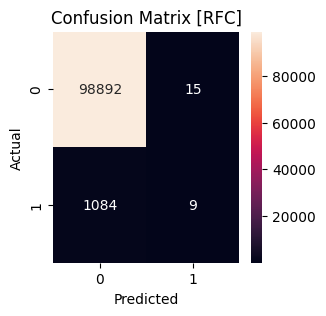

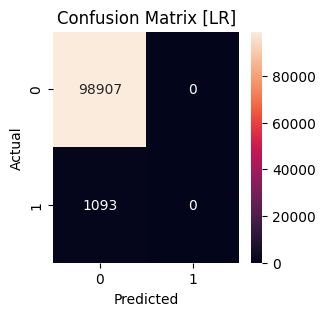

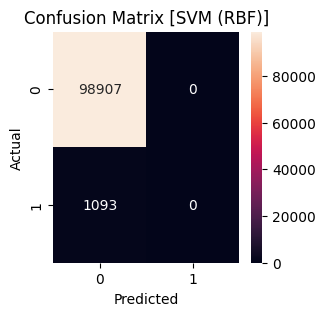

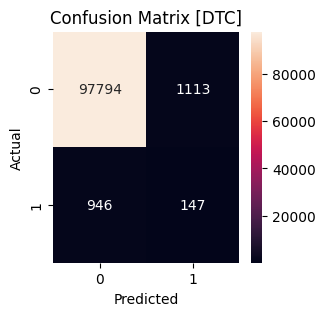

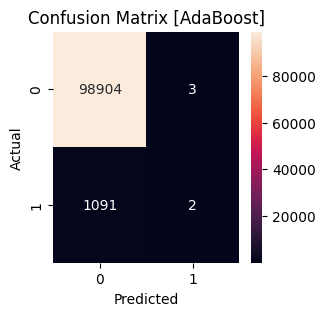

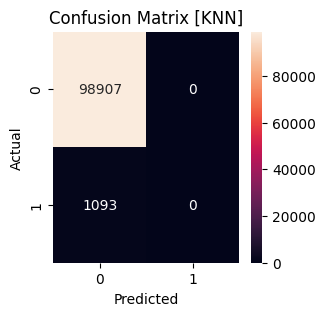

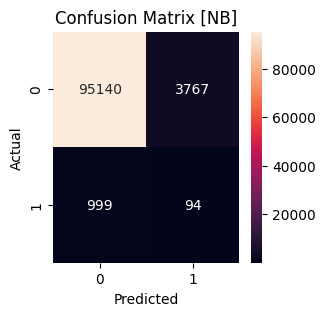

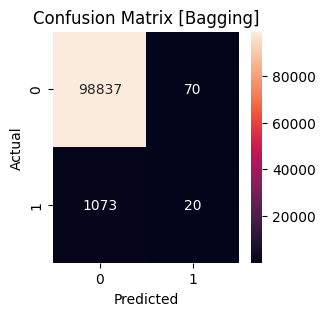

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
i = 0
alg_dict = {'RFC':rfc_pred, 'LR':logistic_pred, 'SVM (RBF)':svm_rbf_pred, 'DTC':decision_tree_pred,
            'AdaBoost':adaboost_pred, 'KNN': knn_pred, 'NB':naive_bayes_pred, 'Bagging': bagging_pred}
wbc = y_test.value_counts()[1]
algs = list(alg_dict.keys())
true_positives = []
true_positive_rate = []
misclassification_counts = []
misclassification_rate = []
for alg_pred in alg_dict.values():
    alg_cm = confusion_matrix(y_test, alg_pred)
    [a,b],[c,d] = confusion_matrix(y_test, alg_pred)
    true_positives.append(d)
    true_positive_rate.append(100*d/wbc)
    misclassification_counts.append(b+c)
    misclassification_rate.append(100*(b+c)/wbc)
    plt.figure(figsize=(3, 3))
    sns.heatmap(alg_cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix [{algs[i]}]')
    plt.show()
    i+=1

#### Percentage of WBS correctly classified

In [45]:
wbs_counts = {'Algorithms': algs, 'True positives': true_positives, 'True positive rate (%)': true_positive_rate,
              'Misclassification count': misclassification_counts, 'Misclassification rate (%)':misclassification_rate}
wbs_count_table = pd.DataFrame(wbs_counts)
wbs_count_table.set_index('Algorithms', inplace=True)

# Display the table
display(wbs_count_table)

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,9,0.823422,1099,100.548948
LR,0,0.000000,1093,100.000000
SVM (RBF),0,0.000000,1093,100.000000
DTC,147,13.449222,2059,188.380604
AdaBoost,2,0.182983,1094,100.091491
KNN,0,0.000000,1093,100.000000
NB,94,8.600183,4766,436.047575
Bagging,20,1.829826,1143,104.574565


## SMOTE

### Apply SMOTE

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state = 2)
re_X, re_y = sm.fit_resample(X,y)
smote_data = pd.DataFrame(re_X).join(re_y)
re_train,re_test = train_test_split(smote_data, test_size = 0.2)

In [47]:
re_X_train = re_train.drop(columns=['target'])
re_X_test = re_test.drop(columns=['target'])
re_y_train = re_train['target']
re_y_test = re_test['target']

In [48]:
re_y_train.value_counts()

0    396153
1    395309
Name: target, dtype: int64

In [49]:
re_y_test.value_counts()

1    99355
0    98511
Name: target, dtype: int64

### ML Algorithms

#### RFC

In [50]:
# re_rfc_clf = RandomForestClassifier(n_estimators=25, random_state=42)
# re_rfc_clf.fit(re_X_train, re_y_train)    

In [51]:
re_rfc_pred = re_rfc_clf.predict(re_X_test)
re_rfc_accuracy = accuracy_score(re_y_test, re_rfc_pred)
print(f'Accuracy (RFC - SMOTE): {re_rfc_accuracy}')

Accuracy (RFC - SMOTE): 0.9989740531470793


#### LR

In [52]:
# re_logistic_clf = LogisticRegression(random_state=42)
# re_logistic_clf.fit(re_X_train, re_y_train)

In [53]:
re_logistic_pred = re_logistic_clf.predict(re_X_test)
re_logistic_accuracy = accuracy_score(re_y_test, re_logistic_pred)
print(f'LR (SMOTE): {re_logistic_accuracy}')

LR (SMOTE): 0.5227173946003861


#### Support Vector Machine (RBF)

In [54]:
# TLE

# re_svm_rbf_clf = SVC(kernel='rbf', random_state=42)
# re_svm_rbf_clf.fit(re_X_train, re_y_train)
# re_svm_rbf_pred = re_svm_rbf_clf.predict(re_X_test)
# re_svm_rbf_accuracy = accuracy_score(re_y_test, re_svm_rbf_pred)
# print(f'SVM (RBF, SMOTE): {re_svm_rbf_accuracy}')

(Ran for more than 60 mins)

#### Decision Tree Classifier

In [55]:
# re_decision_tree_clf = DecisionTreeClassifier(random_state=42)
# re_decision_tree_clf.fit(re_X_train, re_y_train)

In [56]:
re_decision_tree_pred = re_decision_tree_clf.predict(re_X_test)
re_decision_tree_accuracy = accuracy_score(re_y_test, re_decision_tree_pred)
print(f'Decision Tree (SMOTE): {re_decision_tree_accuracy}')

Decision Tree (SMOTE): 0.9961135313798227


#### Gradient Boosting

In [57]:
# TLE

# re_gradient_boosting_clf = GradientBoostingClassifier(random_state=42)
# re_gradient_boosting_clf.fit(re_X_train, re_y_train)
# re_gradient_boosting_pred = re_gradient_boosting_clf.predict(re_X_test)
# re_gradient_boosting_accuracy = accuracy_score(re_y_test, re_gradient_boosting_pred)
# print(f'Gradient Boosting (SMOTE): {re_gradient_boosting_accuracy}')

More than 20 mins

#### AdaBoost

In [58]:
# re_adaboost_clf = AdaBoostClassifier(random_state=42)
# re_adaboost_clf.fit(re_X_train, re_y_train)

In [59]:
re_adaboost_pred = re_adaboost_clf.predict(re_X_test)
re_adaboost_accuracy = accuracy_score(re_y_test, re_adaboost_pred)
print(f'AdaBoost (SMOTE): {re_adaboost_accuracy}')

AdaBoost (SMOTE): 0.9282898527286143


#### K-Nearest Neighbors

In [60]:
# re_knn_clf = KNeighborsClassifier(n_neighbors=5)
# re_knn_clf.fit(re_X_train, re_y_train)

In [61]:
re_knn_pred = re_knn_clf.predict(re_X_test)
re_knn_accuracy = accuracy_score(re_y_test, re_knn_pred)
print(f'K-Nearest Neighbors (SMOTE): {re_knn_accuracy}')

K-Nearest Neighbors (SMOTE): 0.7997280988143491


#### Naive Bayes

In [62]:
# re_naive_bayes_clf = GaussianNB()
# re_naive_bayes_clf.fit(re_X_train, re_y_train)

In [63]:
re_naive_bayes_pred = re_naive_bayes_clf.predict(re_X_test)
re_naive_bayes_accuracy = accuracy_score(re_y_test, re_naive_bayes_pred)
print(f'Naive Bayes (SMOTE): {re_naive_bayes_accuracy}')

Naive Bayes (SMOTE): 0.5226415857196285


#### Bagging Classifier

In [64]:
# re_bagging_clf = BaggingClassifier(random_state=42)
# re_bagging_clf.fit(re_X_train, re_y_train)

In [65]:
re_bagging_pred = bagging_clf.predict(re_X_test)
re_bagging_accuracy = accuracy_score(re_y_test, re_bagging_pred)
print("Bagging (SMOTE):", re_bagging_accuracy)

Bagging (SMOTE): 0.5190836222494011


### Evaluation

#### Metrics

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

re_precision = []
re_recall = []
re_f1 = []
re_accuracy = []
re_alg_dict = {'RFC(SMOTE)':re_rfc_pred, 'LR(SMOTE)':re_logistic_pred, 'DTC(SMOTE)':re_decision_tree_pred, 'AdaBoost(SMOTE)':re_adaboost_pred,
               'KNN(SMOTE)': re_knn_pred, 'NB(SMOTE)':re_naive_bayes_pred, 'Bagging(SMOTE)': re_bagging_pred}
for re_alg_pred in re_alg_dict.values():
    re_precision.append(precision_score(re_y_test, re_alg_pred, average='binary', zero_division=0))
    re_recall.append(recall_score(re_y_test, re_alg_pred, average='binary', zero_division=0))
    re_f1.append(f1_score(re_y_test, re_alg_pred, average='binary'))
    re_accuracy.append(accuracy_score(re_y_test, re_alg_pred))

re_algs = re_alg_dict.keys()
re_metrics = {'Algorithms':re_algs,'Precision':re_precision,'Recall':re_recall,'F1 score':re_f1,'Accuracy':re_accuracy}
re_metric_table = pd.DataFrame(re_metrics)
re_metric_table.set_index('Algorithms',inplace=True)
display(re_metric_table)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC(SMOTE),0.998983,0.998973,0.998978,0.998974
LR(SMOTE),0.693995,0.088521,0.157014,0.522717
DTC(SMOTE),0.994989,0.997282,0.996134,0.996114
AdaBoost(SMOTE),0.919446,0.939500,0.929365,0.928290
KNN(SMOTE),0.783125,0.831403,0.806542,0.799728
NB(SMOTE),0.693266,0.088491,0.156948,0.522642
Bagging(SMOTE),0.996922,0.042383,0.081310,0.519084


#### Confusion Matrices

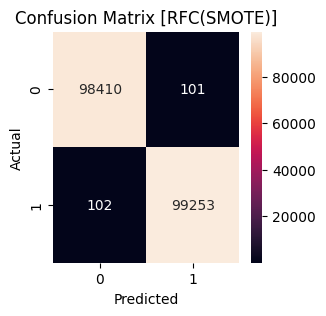

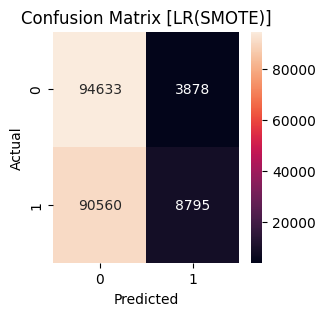

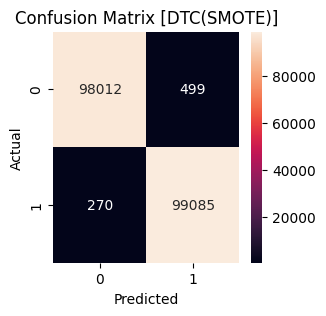

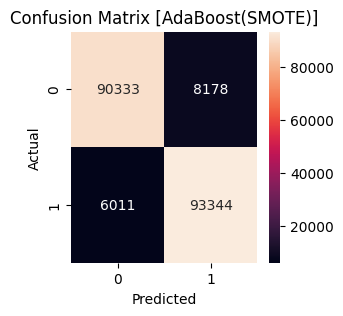

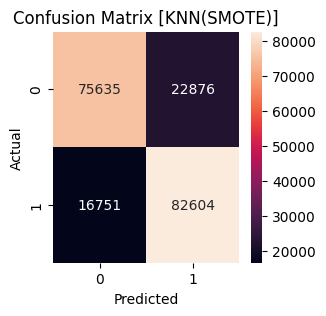

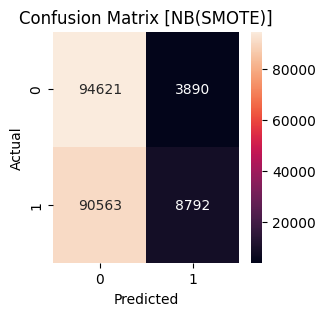

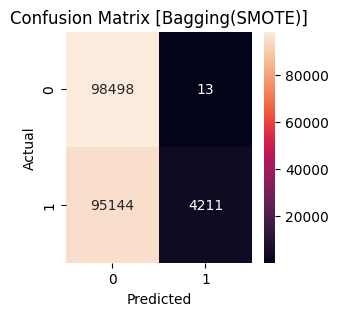

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
i = 0
re_alg_dict = {'RFC(SMOTE)':re_rfc_pred, 'LR(SMOTE)':re_logistic_pred, 'DTC(SMOTE)':re_decision_tree_pred, 'AdaBoost(SMOTE)':re_adaboost_pred,
               'KNN(SMOTE)': re_knn_pred, 'NB(SMOTE)':re_naive_bayes_pred, 'Bagging(SMOTE)': re_bagging_pred}
re_algs = list(re_alg_dict.keys())
for re_alg_pred in re_alg_dict.values():
    re_alg_cm = confusion_matrix(re_y_test, re_alg_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(re_alg_cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix [{re_algs[i]}]')
    plt.show()
    i+=1

## Testing on Original Data

### Predictions on the original dateset

In [68]:
sm_rfc_pred = re_rfc_clf.predict(X_test)
sm_logistic_pred = re_logistic_clf.predict(X_test)
sm_decision_tree_pred = re_decision_tree_clf.predict(X_test)
sm_adaboost_pred = re_adaboost_clf.predict(X_test)
sm_knn_pred = re_knn_clf.predict(X_test)
sm_naive_bayes_pred = re_naive_bayes_clf.predict(X_test)
sm_bagging_pred = re_bagging_clf.predict(X_test)

### Evaluation

In [69]:
# sm_percentages = []
# sm_misclassification_counts = []
# sm_alg_dict = {'RFC(SMOTE-benchmarking)':sm_rfc_pred, 'LR(SMOTE-benchmarking)':sm_logistic_pred, 'DTC(SMOTE-benchmarking)':sm_decision_tree_pred, 
#                'AdaBoost(SMOTE-benchmarking)':sm_adaboost_pred, 'KNN(SMOTE-benchmarking)': sm_knn_pred, 
#                'NB(SMOTE-benchmarking)':sm_naive_bayes_pred, 'Bagging(SMOTE-benchmarking)': sm_bagging_pred}
# for sm_alg_pred in sm_alg_dict.values():
#     sm_percentages.append((1 - (abs(pd.Series(sm_alg_pred).value_counts()[1] - y_test.value_counts()[1])/y_test.value_counts()[1]))*100)
#     sm_misclassification_counts.append(y_test.value_counts()[1] - pd.Series(sm_alg_pred).value_counts()[1])
# sm_algs = sm_alg_dict.keys()
# sm_wbs_counts = {'Algorithms':sm_algs, 'Percentages':sm_percentages, 'Misclassification count':sm_misclassification_counts}
# sm_wbs_count_table = pd.DataFrame(sm_wbs_counts)
# sm_wbs_count_table.set_index('Algorithms',inplace=True)
# display(sm_wbs_count_table)

#### Metrics

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

sm_precision = []
sm_recall = []
sm_f1 = []
sm_accuracy = []
sm_alg_dict = {'RFC(SMOTE-benchmarking)':sm_rfc_pred, 'LR(SMOTE-benchmarking)':sm_logistic_pred, 'DTC(SMOTE-benchmarking)':sm_decision_tree_pred, 
               'AdaBoost(SMOTE-benchmarking)':sm_adaboost_pred, 'KNN(SMOTE-benchmarking)': sm_knn_pred, 
               'NB(SMOTE-benchmarking)':sm_naive_bayes_pred, 'Bagging(SMOTE-benchmarking)': sm_bagging_pred}
for sm_alg_pred in sm_alg_dict.values():
    sm_precision.append(precision_score(y_test, sm_alg_pred, average='binary', zero_division=0))
    sm_recall.append(recall_score(y_test, sm_alg_pred, average='binary', zero_division=0))
    sm_f1.append(f1_score(y_test, sm_alg_pred, average='binary'))
    sm_accuracy.append(accuracy_score(y_test, sm_alg_pred))

sm_algs = sm_alg_dict.keys()
sm_metrics = {'Algorithms':sm_algs,'Precision':sm_precision,'Recall':sm_recall,'F1 score':sm_f1,'Accuracy':sm_accuracy}
sm_metric_table = pd.DataFrame(sm_metrics)
sm_metric_table.set_index('Algorithms',inplace=True)
display(sm_metric_table)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC(SMOTE-benchmarking),0.917273,0.923147,0.920201,0.99825
LR(SMOTE-benchmarking),0.024428,0.086002,0.038049,0.95247
DTC(SMOTE-benchmarking),0.668024,0.900274,0.766952,0.99402
AdaBoost(SMOTE-benchmarking),0.061118,0.493138,0.108757,0.91166
KNN(SMOTE-benchmarking),0.039785,0.867338,0.076080,0.76975
NB(SMOTE-benchmarking),0.024093,0.085087,0.037553,0.95233
Bagging(SMOTE-benchmarking),0.890291,0.838975,0.863872,0.99711


#### Confusion Matrices

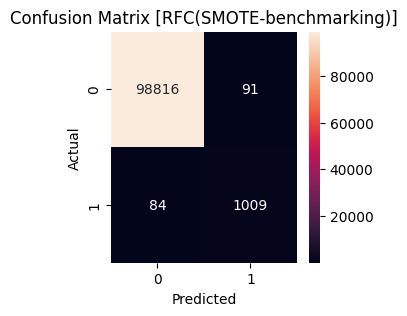

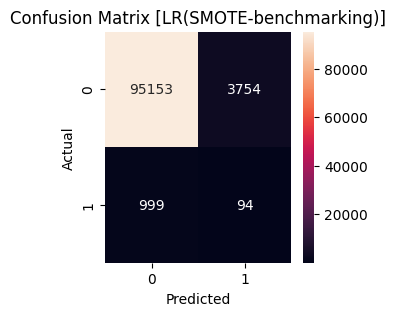

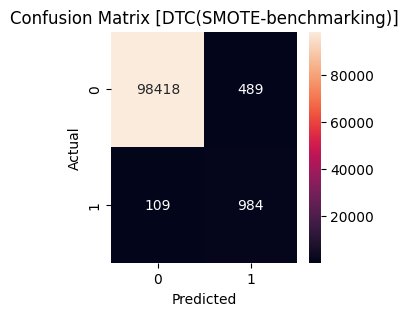

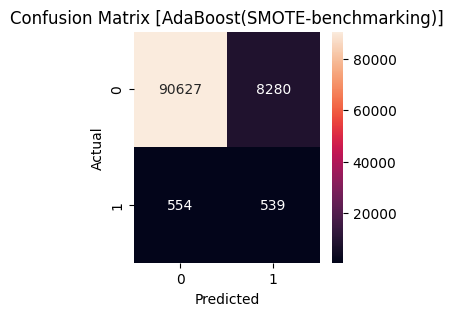

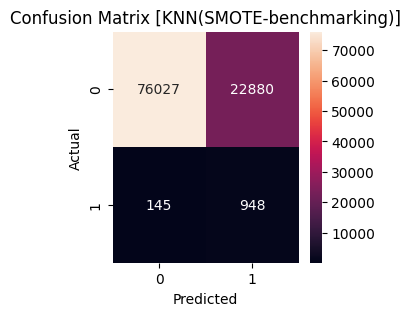

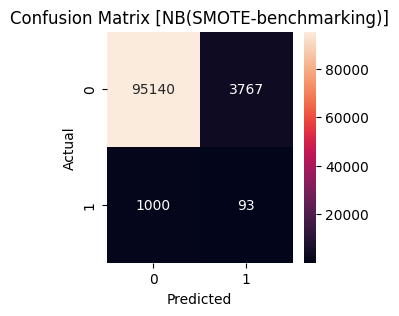

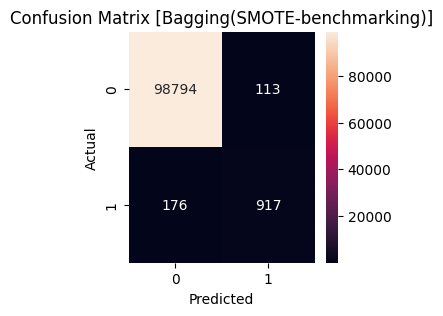

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
i = 0
sm_alg_dict = {'RFC(SMOTE-benchmarking)':sm_rfc_pred, 'LR(SMOTE-benchmarking)':sm_logistic_pred, 'DTC(SMOTE-benchmarking)':sm_decision_tree_pred, 
               'AdaBoost(SMOTE-benchmarking)':sm_adaboost_pred, 'KNN(SMOTE-benchmarking)': sm_knn_pred, 
               'NB(SMOTE-benchmarking)':sm_naive_bayes_pred, 'Bagging(SMOTE-benchmarking)': sm_bagging_pred}
sm_algs = list(sm_alg_dict.keys())
wbc = y_test.value_counts()[1]
sm_true_positives = []
sm_true_positive_rate = []
sm_misclassification_counts = []
sm_misclassification_rate = []
for sm_alg_pred in sm_alg_dict.values():
    sm_alg_cm = confusion_matrix(y_test, sm_alg_pred)
    [a,b],[c,d] = confusion_matrix(y_test, sm_alg_pred)
    sm_true_positives.append(d)
    sm_true_positive_rate.append(100*d/wbc)
    sm_misclassification_counts.append(b+c)
    sm_misclassification_rate.append(100*(b+c)/wbc)
    plt.figure(figsize=(3, 3))
    sns.heatmap(sm_alg_cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix [{sm_algs[i]}]')
    plt.show()
    i+=1

#### Percentage of WBS correctly classified

In [72]:
sm_wbs_counts = {'Algorithms': sm_algs, 'True positives': sm_true_positives, 'True positive rate (%)': sm_true_positive_rate,
              'Misclassification count': sm_misclassification_counts, 'Misclassification rate (%)':sm_misclassification_rate}
sm_wbs_count_table = pd.DataFrame(sm_wbs_counts)
sm_wbs_count_table.set_index('Algorithms', inplace=True)

# Display the table
display(sm_wbs_count_table)

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC(SMOTE-benchmarking),1009,92.314730,175,16.010979
LR(SMOTE-benchmarking),94,8.600183,4753,434.858188
DTC(SMOTE-benchmarking),984,90.027447,598,54.711802
AdaBoost(SMOTE-benchmarking),539,49.313815,8834,808.234218
KNN(SMOTE-benchmarking),948,86.733760,23025,2106.587374
NB(SMOTE-benchmarking),93,8.508692,4767,436.139067
Bagging(SMOTE-benchmarking),917,83.897530,289,26.440988


#### Comparison of confusion matrices

In [73]:
len(X_test)

100000

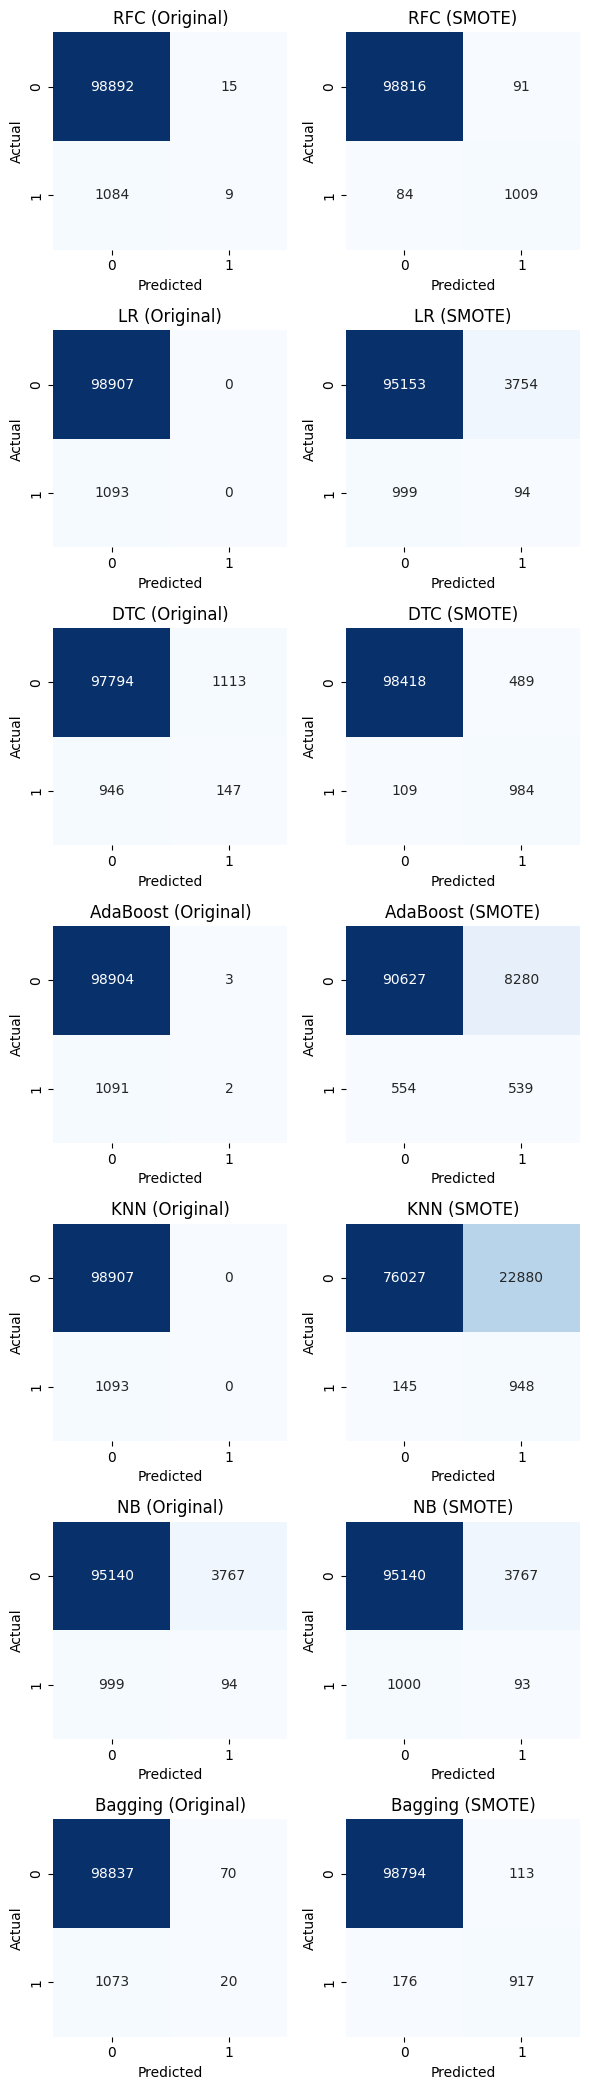

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Original predictions
alg_dict = {
    'RFC': rfc_pred, 
    'LR': logistic_pred, 
    'DTC': decision_tree_pred,
    'AdaBoost': adaboost_pred, 
    'KNN': knn_pred, 
    'NB': naive_bayes_pred, 
    'Bagging': bagging_pred
}

# SMOTE-based predictions
sm_alg_dict = {
    'RFC (SMOTE)': sm_rfc_pred, 
    'LR (SMOTE)': sm_logistic_pred, 
    'DTC (SMOTE)': sm_decision_tree_pred, 
    'AdaBoost (SMOTE)': sm_adaboost_pred, 
    'KNN (SMOTE)': sm_knn_pred, 
    'NB (SMOTE)': sm_naive_bayes_pred, 
    'Bagging (SMOTE)': sm_bagging_pred
}

# Create subplots for 2 columns
fig, axes = plt.subplots(len(alg_dict), 2, figsize=(6, len(alg_dict) * 3))

# Plot both original and SMOTE confusion matrices
for i, ((alg_name, alg_pred), (sm_alg_name, sm_alg_pred)) in enumerate(zip(alg_dict.items(), sm_alg_dict.items())):
    # Original confusion matrix
    cm = confusion_matrix(y_test, alg_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i, 0], cbar=False)
    axes[i, 0].set_title(f'{alg_name} (Original)')
    axes[i, 0].set_xlabel('Predicted')
    axes[i, 0].set_ylabel('Actual')

    # SMOTE confusion matrix
    sm_cm = confusion_matrix(y_test, sm_alg_pred)
    sns.heatmap(sm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[i, 1], cbar=False)
    axes[i, 1].set_title(f'{sm_alg_name}')
    axes[i, 1].set_xlabel('Predicted')
    axes[i, 1].set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


## Save models

In [75]:
import pickle

models = {
    'RandomForest': rfc_clf,
    'LogisticRegression': logistic_clf,
    'SVM_RBF': svm_rbf_clf,
    'DTC': decision_tree_clf,
    'AdaBoost': adaboost_clf,
    'KNN': knn_clf,
    'NB': naive_bayes_clf,
    'Bagging': bagging_clf
}

with open('raw_models.pkl', 'wb') as f:
    pickle.dump(models, f)

In [76]:
re_models = {
    'RandomForest_SMOTE': re_rfc_clf,
    'LogisticRegression_SMOTE': re_logistic_clf,
    'DTC_SMOTE': re_decision_tree_clf,
    'AdaBoost_SMOTE': re_adaboost_clf,
    'KNN_MOTE': re_knn_clf,
    'NB_SMOTE': re_naive_bayes_clf,
    'Bagging_SMOTE': re_bagging_clf
}

with open('re_models_smote.pkl', 'wb') as f:
    pickle.dump(re_models, f)

## Visualization

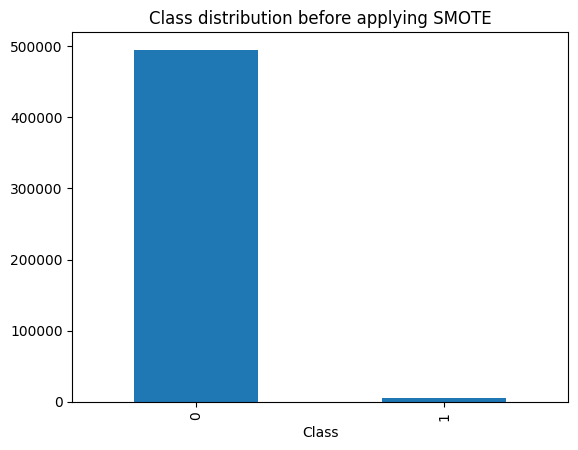

In [77]:
pd.Series(y).value_counts().plot(kind='bar', title='Class distribution before applying SMOTE', xlabel='Class')
plt.show()

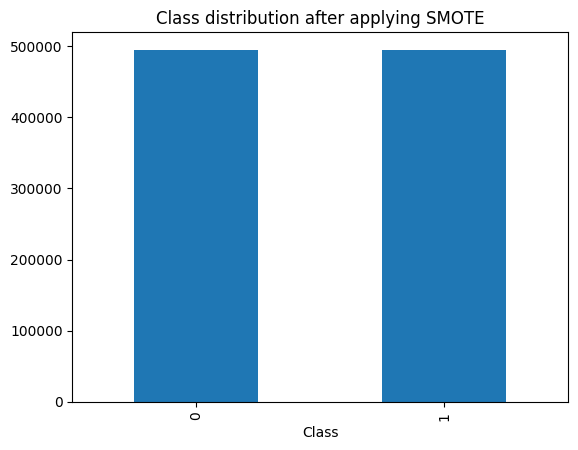

In [78]:
pd.Series(re_y).value_counts().plot(kind='bar', title='Class distribution after applying SMOTE', xlabel='Class')
plt.show()

In [79]:
y_test.value_counts()

0    98907
1     1093
Name: target, dtype: int64

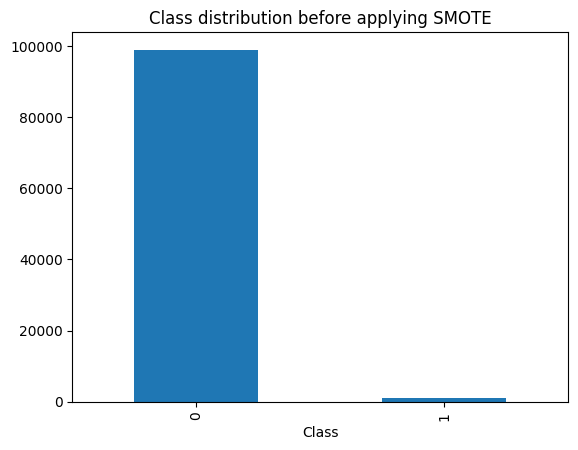

In [80]:
pd.Series(y_test).value_counts().plot(kind='bar', title='Class distribution before applying SMOTE', xlabel='Class')
plt.show()

In [81]:
X_test['ra']

104241    271.142801
199676     71.248761
140199     33.696056
132814    181.972698
408697    301.738853
             ...    
66361      93.628288
497228    255.859483
152728     40.282751
50155     299.702749
240408    107.101285
Name: ra, Length: 100000, dtype: float64

In [82]:
X_test['dec']

104241   -33.280217
199676    56.621466
140199    53.393131
132814   -49.929897
408697    38.029304
            ...    
66361      0.970236
497228   -23.077522
152728    56.163474
50155      9.330902
240408    15.729813
Name: dec, Length: 100000, dtype: float64

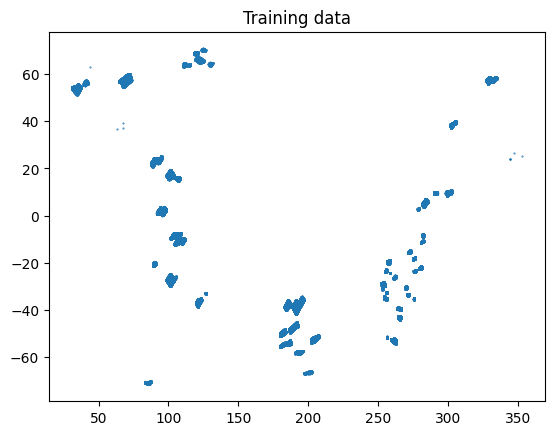

In [83]:
import matplotlib.pyplot as plt 
import numpy as np 

plt.scatter(X_train['ra'], X_train['dec'], s=0.2)
plt.title("Training data")
plt.show()

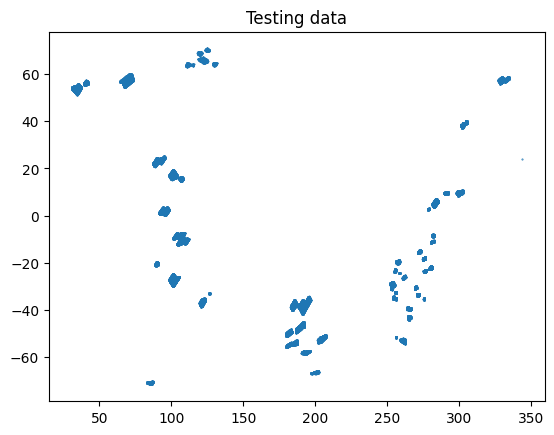

In [84]:
import matplotlib.pyplot as plt 
import numpy as np 

plt.scatter(X_test['ra'], X_test['dec'], s=0.2)
plt.title("Testing data")
plt.show()

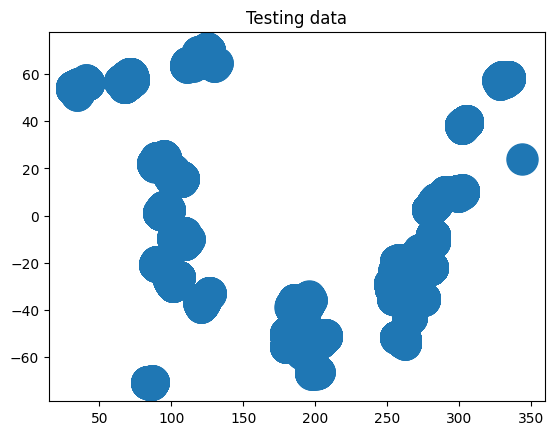

In [85]:
plt.scatter(X_test['ra'], X_test['dec'], s=500)
plt.title("Testing data")
plt.show()

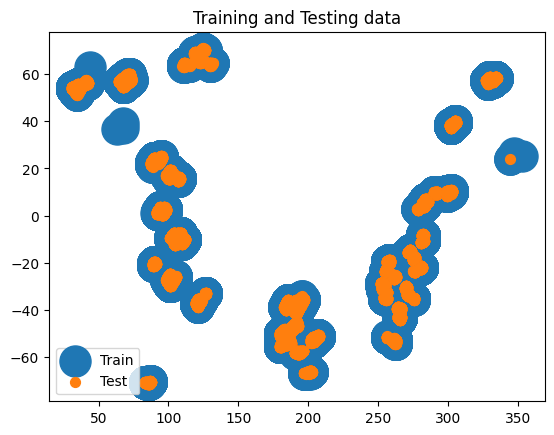

In [86]:
plt.scatter(X_train['ra'], X_train['dec'], s=500)
plt.scatter(X_test['ra'], X_test['dec'], s=50)
plt.legend(['Train','Test'])
plt.title("Training and Testing data")
plt.show()

## Clustering

In [87]:
# Convert predictions to boolean masks 
sm_rfc_wbs_mask = sm_rfc_pred == 1
sm_logistic_wbs_mask = sm_logistic_pred == 1
sm_decision_tree_wbs_mask = sm_decision_tree_pred == 1
sm_adaboost_wbs_mask = sm_adaboost_pred == 1
sm_knn_wbs_mask = sm_knn_pred == 1
sm_naive_bayes_wbs_mask = sm_naive_bayes_pred == 1
sm_bagging_wbs_mask = sm_bagging_pred == 1

In [88]:
# Filter X_train and X_test based on each model's predictions

# X_train_rfc_wbs = X_train[sm_rfc_wbs_mask]
X_test_rfc_wbs = X_test[sm_rfc_wbs_mask]

# X_train_logistic_wbs = X_train[sm_logistic_wbs_mask]
X_test_logistic_wbs = X_test[sm_logistic_wbs_mask]

# X_train_decision_tree_wbs = X_train[sm_decision_tree_wbs_mask]
X_test_decision_tree_wbs = X_test[sm_decision_tree_wbs_mask]

# X_train_adaboost_wbs = X_train[sm_adaboost_wbs_mask]
X_test_adaboost_wbs = X_test[sm_adaboost_wbs_mask]

# X_train_knn_wbs = X_train[sm_knn_wbs_mask]
X_test_knn_wbs = X_test[sm_knn_wbs_mask]

# X_train_naive_bayes_wbs = X_train[sm_naive_bayes_wbs_mask]
X_test_naive_bayes_wbs = X_test[sm_naive_bayes_wbs_mask]

# X_train_bagging_wbs = X_train[sm_bagging_wbs_mask]
X_test_bagging_wbs = X_test[sm_bagging_wbs_mask]

# Example: Print the shapes of filtered datasets
# print("RFC WBS Stars in X_train:", X_train_rfc_wbs.shape)
print("RFC WBS Stars in X_test:", X_test_rfc_wbs.shape)

RFC WBS Stars in X_test: (1100, 63)


In [89]:
import pandas as pd
from sklearn.cluster import KMeans

def identify_binary_systems_with_parallax(data, n_clusters, proximity_threshold=0.01, parallax_threshold=0.1):
    """
    Perform K-means clustering and identify potential binary systems considering 'ra', 'dec', and 'parallax'.
    
    Parameters:
        data (DataFrame): Input data with 'ra', 'dec', and 'parallax' columns.
        n_clusters (int): Number of clusters for K-means.
        proximity_threshold (float): Maximum spatial distance in 'ra' and 'dec' to consider stars as a binary system.
        parallax_threshold (float): Maximum parallax difference to consider stars as a binary system.
        
    Returns:
        binary_systems (list): List of binary systems, each as a list of indices or star IDs.
    """
    # Ensure data has 'ra', 'dec', and 'parallax'
    coords = data[['ra', 'dec']].values

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['cluster'] = kmeans.fit_predict(coords)

    binary_systems = []

    # For each cluster, find pairs of stars within thresholds
    for cluster_id in range(n_clusters):
        cluster_data = data[data['cluster'] == cluster_id]
        cluster_coords = cluster_data[['ra', 'dec']].values
        cluster_parallax = cluster_data['parallax'].values
        
        # Check for pairs of stars close enough in spatial coordinates and parallax
        for i in range(len(cluster_coords)):
            for j in range(i + 1, len(cluster_coords)):
                spatial_distance = ((cluster_coords[i][0] - cluster_coords[j][0]) ** 2 +
                                    (cluster_coords[i][1] - cluster_coords[j][1]) ** 2) ** 0.5
                parallax_difference = abs(cluster_parallax[i] - cluster_parallax[j])
                
                if spatial_distance < proximity_threshold and parallax_difference < parallax_threshold:
                    binary_systems.append(cluster_data.iloc[[i, j]].index.tolist())

    return binary_systems

# Example: Identify binary systems in X_test_rfc_wbs
n_clusters = 10  # Set the number of clusters
proximity_threshold = 0.1  # Spatial proximity in 'ra' and 'dec'
parallax_threshold = 0.1  # Parallax difference threshold
# X_test_rfc_wbs = pd.DataFrame(X_test_rfc_wbs, columns=['ra', 'dec', 'parallax'])  # Ensure it's a DataFrame

binary_systems_rfc = identify_binary_systems_with_parallax(X_test_rfc_wbs, n_clusters, proximity_threshold, parallax_threshold)

# Print the binary systems
print("Binary Systems (RFC with Parallax):")
for binary in binary_systems_rfc:
    print(binary)


c:\Users\amoya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amoya\AppData\Local\Temp\ipykernel_16324\3596078675.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.fit_predict(coords)


Binary Systems (RFC with Parallax):
[54202, 54768]
[50041, 49881]
[56844, 56935]
[44004, 43679]
[55255, 55409]
[52866, 52865]
[83623, 83619]
[54436, 54435]
[50334, 50326]
[47793, 47629]
[71985, 71986]
[94585, 94646]
[95315, 95805]
[84585, 84566]
[59689, 78501]
[63303, 63675]
[73346, 73347]
[83735, 83734]
[76935, 76926]
[95603, 95605]
[78974, 78941]
[74243, 75004]
[82994, 82995]
[81016, 80697]
[60103, 60274]
[92024, 91731]
[92024, 91617]
[96140, 58002]
[60274, 60308]
[61302, 61266]
[57460, 57461]
[79729, 79699]
[77053, 77099]
[60604, 60508]
[68142, 68141]
[57746, 57747]
[97405, 97278]
[84312, 84313]
[91731, 91617]
[64572, 64614]
[59838, 58250]
[93796, 93578]
[93796, 60955]
[62236, 61775]
[61371, 60955]
[93578, 60955]
[51399, 52017]
[35444, 35443]
[47965, 47964]
[43428, 43535]
[41319, 41320]
[38396, 34205]
[104532, 104611]
[111425, 111621]
[98510, 98340]
[102427, 102307]
[100698, 100697]
[113446, 113447]
[116104, 116098]
[97559, 96685]
[97559, 109166]
[27452, 29177]
[27452, 28191]
[96685

In [90]:
len(X_test_rfc_wbs)

1100

In [91]:
len(binary_systems_rfc)

73

c:\Users\amoya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


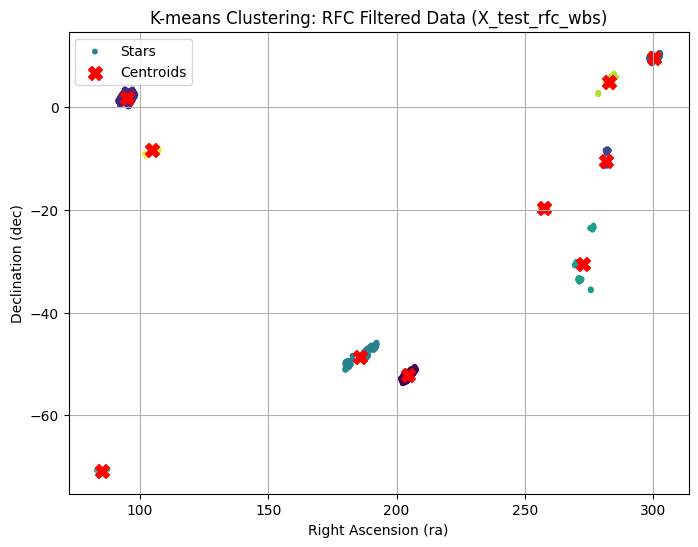

c:\Users\amoya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


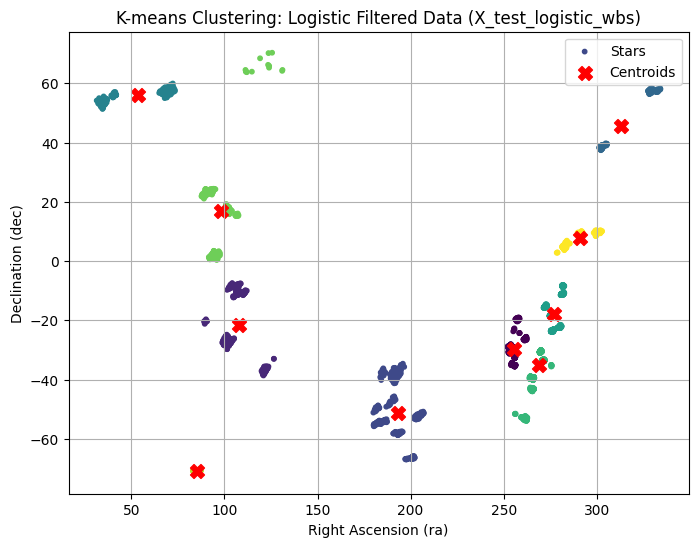

c:\Users\amoya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


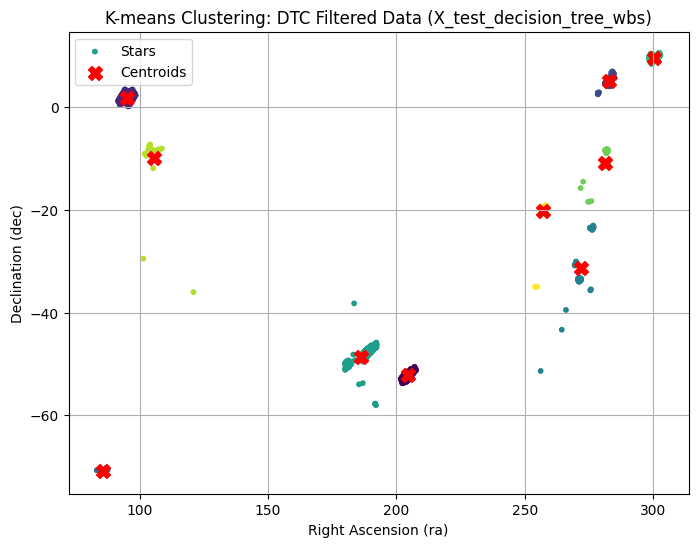

c:\Users\amoya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


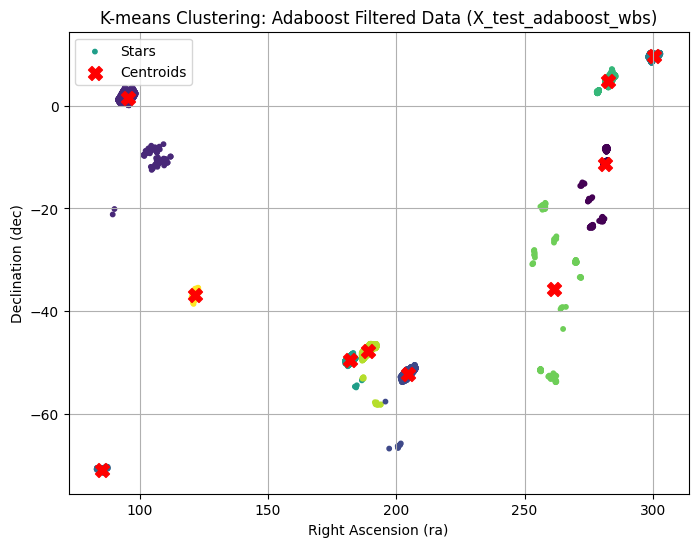

c:\Users\amoya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


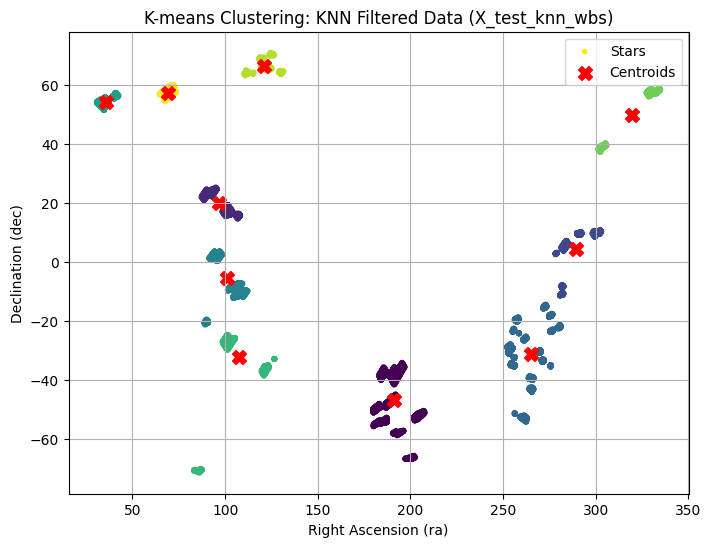

c:\Users\amoya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


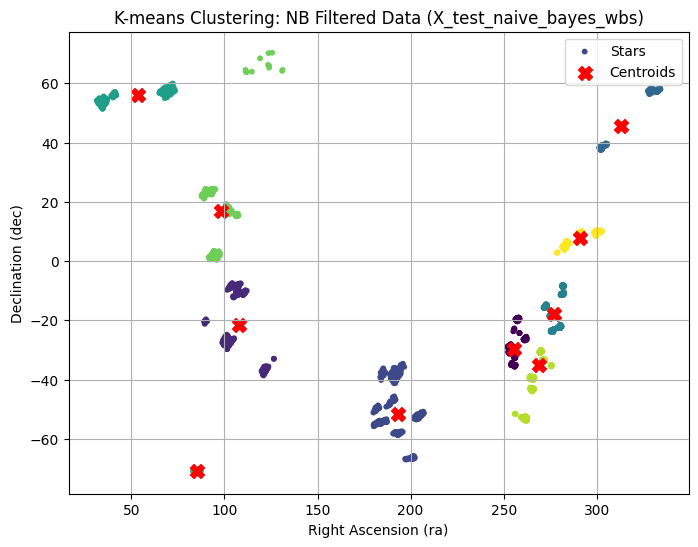

c:\Users\amoya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


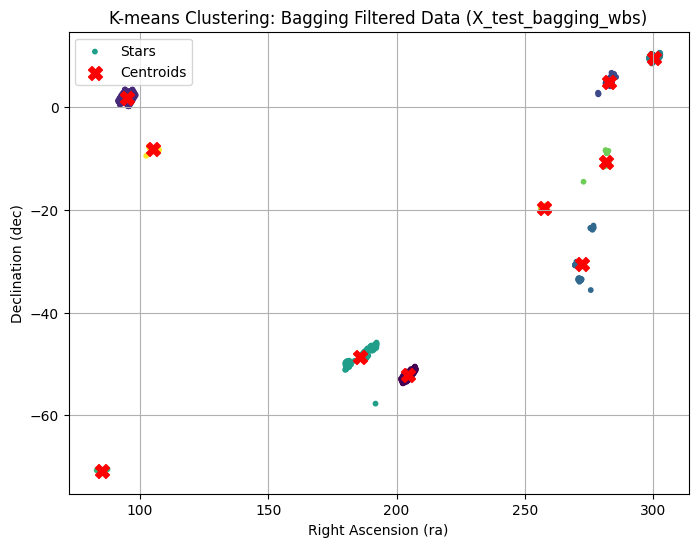

In [92]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to perform K-means clustering and visualize results
def perform_kmeans_and_plot(data, n_clusters, title):
    """
    Perform K-means clustering on the 'ra' and 'dec' columns and plot the results.
    :param data: DataFrame or array containing 'ra' and 'dec' columns
    :param n_clusters: Number of clusters for K-means
    :param title: Title for the plot
    """
    # Ensure the data contains 'ra' and 'dec' columns
    coords = data[['ra', 'dec']].values

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(coords)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='viridis', s=10, label='Stars')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, label='Centroids', marker='X')
    plt.title(f"K-means Clustering: {title}")
    plt.xlabel("Right Ascension (ra)")
    plt.ylabel("Declination (dec)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the number of clusters
n_clusters = 10
perform_kmeans_and_plot(X_test_rfc_wbs, n_clusters, "RFC Filtered Data (X_test_rfc_wbs)")
perform_kmeans_and_plot(X_test_logistic_wbs, n_clusters, "Logistic Filtered Data (X_test_logistic_wbs)")
perform_kmeans_and_plot(X_test_decision_tree_wbs, n_clusters, "DTC Filtered Data (X_test_decision_tree_wbs)")
perform_kmeans_and_plot(X_test_adaboost_wbs, n_clusters, "Adaboost Filtered Data (X_test_adaboost_wbs)")
perform_kmeans_and_plot(X_test_knn_wbs, n_clusters, "KNN Filtered Data (X_test_knn_wbs)")
perform_kmeans_and_plot(X_test_naive_bayes_wbs, n_clusters, "NB Filtered Data (X_test_naive_bayes_wbs)")
perform_kmeans_and_plot(X_test_bagging_wbs, n_clusters, "Bagging Filtered Data (X_test_bagging_wbs)")

# Filtering

1. Projected Separation
2. Parallax error
3. g-magnitude
4. projected velocity difference

In [93]:
import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u

def find_gaia_binary_pairs(data):
    # Ensure data is a pandas DataFrame
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
    
    # Check for required columns
    required_columns = ['ra', 'dec', 'parallax', 'pmra', 'pmdec']
    missing_columns = [col for col in required_columns if col not in data.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
    
    # Create SkyCoord objects for all stars
    coords = SkyCoord(ra=data['ra'].values*u.degree, 
                      dec=data['dec'].values*u.degree, 
                      distance=1000/data['parallax'].values*u.parsec,
                      pm_ra_cosdec=data['pmra'].values*u.mas/u.yr,
                      pm_dec=data['pmdec'].values*u.mas/u.yr)
    
    # Calculate angular and 3D separations
    separations = coords.separation(coords[:, np.newaxis])
    distances_3d = coords.separation_3d(coords[:, np.newaxis])
    
    # Find mutual closest neighbors
    closest_indices = np.argpartition(separations.value, 1, axis=1)[:, 1]
    pairs = set()
    for i, closest in enumerate(closest_indices):
        if closest_indices[closest] == i:
            pair = tuple(sorted([i, closest]))
            
            # Additional checks for Gaia-specific criteria
            sep_arcsec = separations[pair[0], pair[1]].arcsec
            dist_pc = distances_3d[pair[0], pair[1]].pc
            pm_diff = np.hypot(coords[pair[0]].pm_ra_cosdec - coords[pair[1]].pm_ra_cosdec,
                               coords[pair[0]].pm_dec - coords[pair[1]].pm_dec)
            
            if (sep_arcsec < 1 or (dist_pc < 1000 and pm_diff < 2*u.mas/u.yr)):
                pairs.add(pair)
    
    return pairs

# Example usage
data = X_test_rfc_wbs  # Your Gaia dataset
try:
    binary_pairs = find_gaia_binary_pairs(data)
    for pair in binary_pairs:
        print(f"Binary pair: Star {pair[0]} and Star {pair[1]}")
except ValueError as e:
    print(f"Error: {e}")
    print("Please ensure your dataset contains the required columns: ra, dec, parallax, pmra, pmdec")


Binary pair: Star 528 and Star 686
Binary pair: Star 243 and Star 300
Binary pair: Star 395 and Star 1026
Binary pair: Star 496 and Star 962
Binary pair: Star 140 and Star 949
Binary pair: Star 457 and Star 659
Binary pair: Star 334 and Star 674
Binary pair: Star 537 and Star 902
Binary pair: Star 132 and Star 353
Binary pair: Star 613 and Star 937
Binary pair: Star 634 and Star 994
Binary pair: Star 670 and Star 983
Binary pair: Star 832 and Star 1054
Binary pair: Star 881 and Star 953
Binary pair: Star 891 and Star 954
Binary pair: Star 652 and Star 776
Binary pair: Star 691 and Star 966
Binary pair: Star 490 and Star 924
Binary pair: Star 116 and Star 805
Binary pair: Star 259 and Star 1049
Binary pair: Star 569 and Star 741
Binary pair: Star 134 and Star 286
Binary pair: Star 251 and Star 804
Binary pair: Star 136 and Star 551
Binary pair: Star 173 and Star 689
Binary pair: Star 45 and Star 775
Binary pair: Star 123 and Star 862
Binary pair: Star 595 and Star 1016
Binary pair: Star

In [94]:
len(X_test_rfc_wbs)

1100

In [95]:
len(binary_pairs)

68

In [96]:
X_test_rfc_wbs.columns

Index(['random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error',
       'parallax', 'parallax_error', 'parallax_over_error', 'pm', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr',
       'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr',
       'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr',
       'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_matched_transits',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'matched_transits', 'new_matched_transits', 'matched_transits_removed',
       'ipd_gof_harmonic_amplitude', 'ipd_gof_harmonic_phase',
       'ipd_frac_multi_peak', 'ipd_frac_odd_win', 'ruwe', 'duplicate

In [97]:
import matplotlib.pyplot as plt

def plot_hotspot(data, binary_pairs, center_ra, center_dec, width=0.1):
    plt.figure(figsize=(10, 8))
    
    # Filter data to include only stars within the specified region
    mask = ((data['ra'] > center_ra - width/2) & (data['ra'] < center_ra + width/2) &
            (data['dec'] > center_dec - width/2) & (data['dec'] < center_dec + width/2))
    region_data = data[mask]
    
    # Plot stars in the region
    plt.scatter(region_data['ra'], region_data['dec'], color='blue', alpha=0.6, s=20, label='Stars')
    
    # Plot binary pairs
    for pair in binary_pairs:
        star1 = data.iloc[pair[0]]
        star2 = data.iloc[pair[1]]
        if mask.iloc[pair[0]] or mask.iloc[pair[1]]:  # Check if either star is in the region
            plt.plot([star1['ra'], star2['ra']], [star1['dec'], star2['dec']], 
                     color='red', linewidth=1, alpha=0.7)
    
    plt.xlabel('Right Ascension (degrees)')
    plt.ylabel('Declination (degrees)')
    plt.title(f'Hotspot at RA={center_ra:.3f}, Dec={center_dec:.3f}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xlim(center_ra - width/2, center_ra + width/2)
    plt.ylim(center_dec - width/2, center_dec + width/2)
    plt.show()

# Example usage:
# plot_hotspot(data, binary_pairs, center_ra=180.5, center_dec=-0.2, width=0.1)


In [98]:
data = X_test_rfc_wbs
coords = data[['ra', 'dec']].values

# Perform K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
labels = kmeans.fit_predict(coords)
hotspots = []
for cluster_id in range(n_clusters):
    ra, dec = kmeans.cluster_centers_[cluster_id, 0], kmeans.cluster_centers_[cluster_id, 1]
    hotspots.append((ra,dec))

c:\Users\amoya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


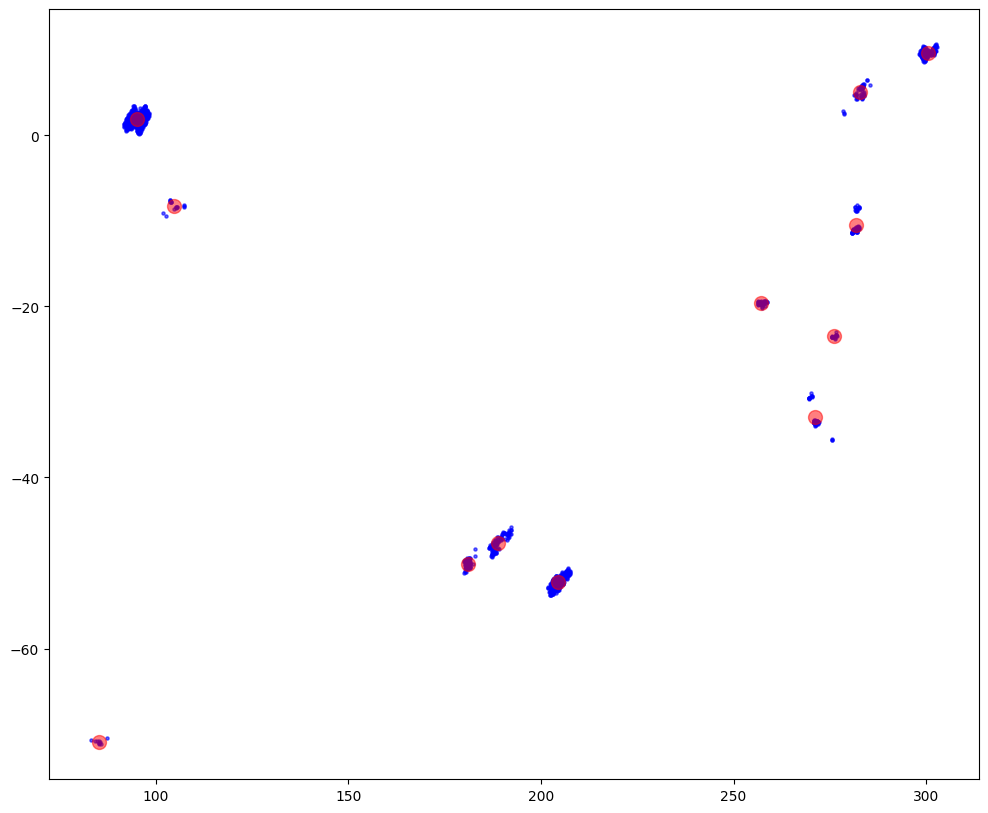

In [99]:
plt.figure(figsize=(12, 10))
plt.scatter(data['ra'], data['dec'], color='blue', alpha=0.6, s=5, label='Stars')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', alpha=0.5, s=100, label='Centers')
plt.show()

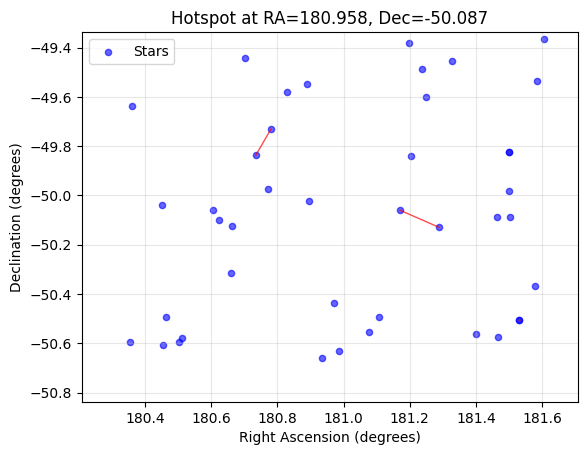

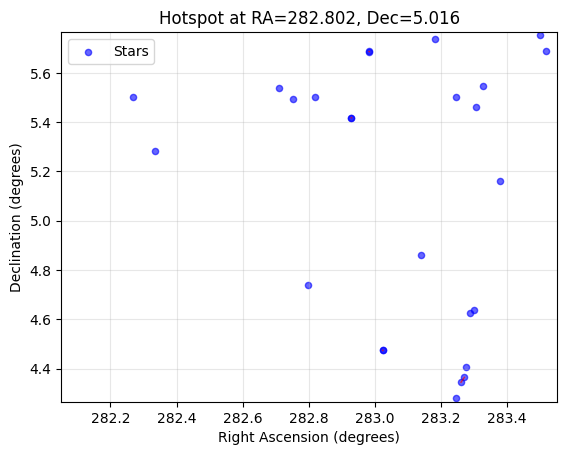

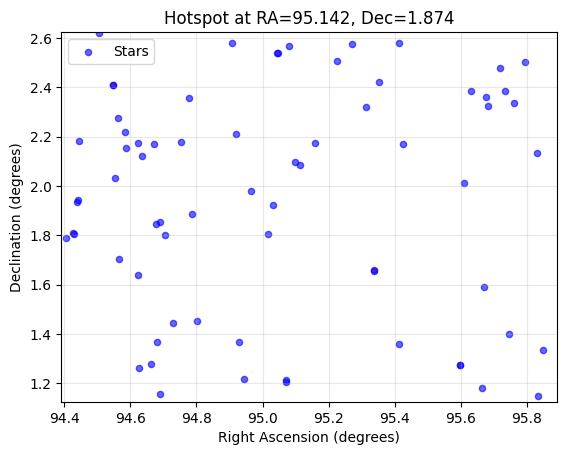

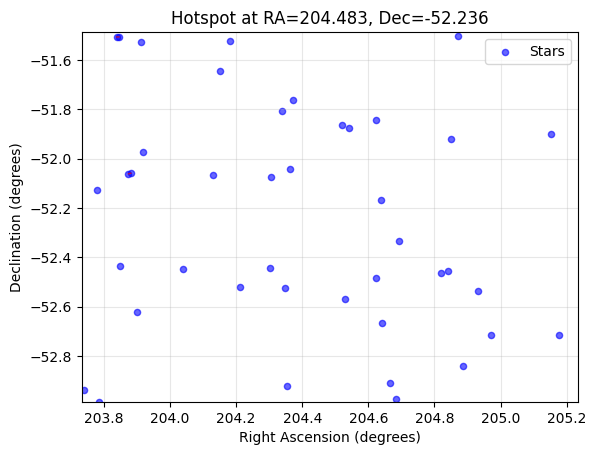

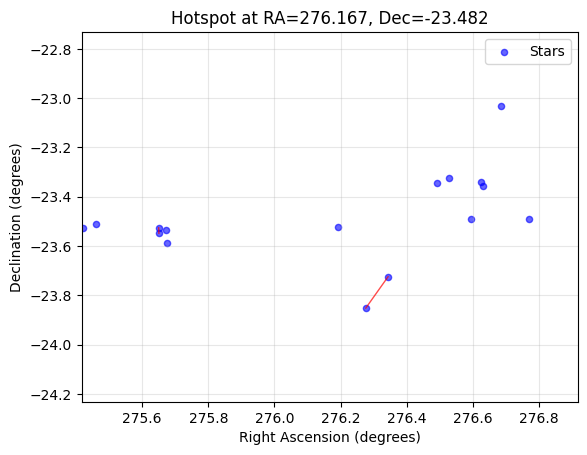

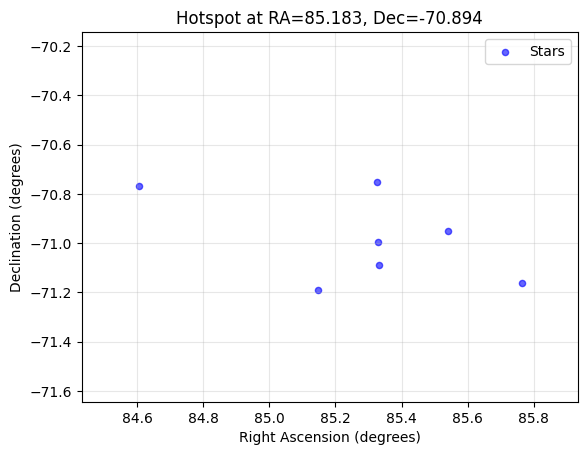

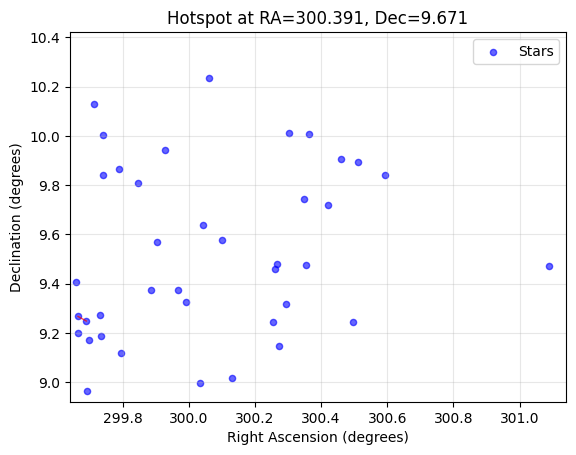

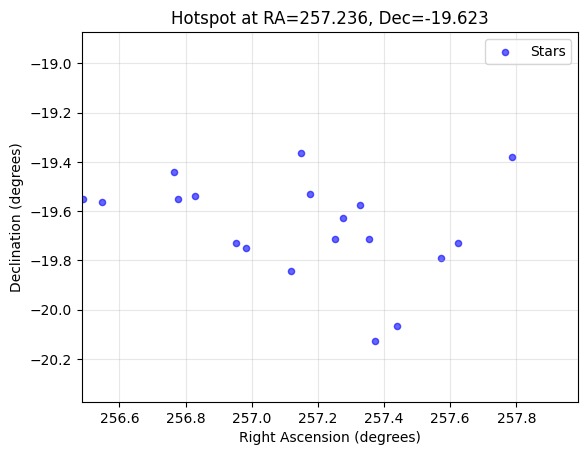

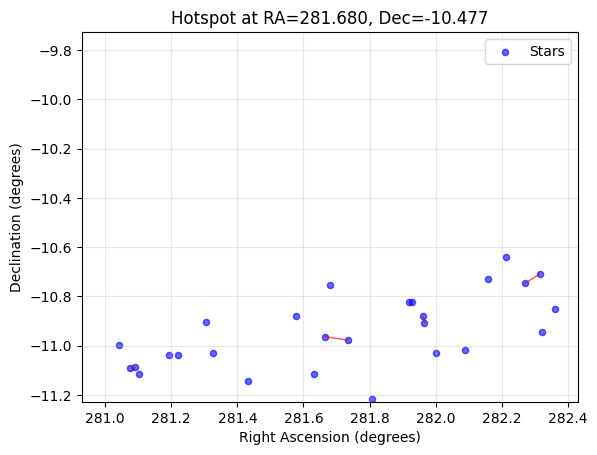

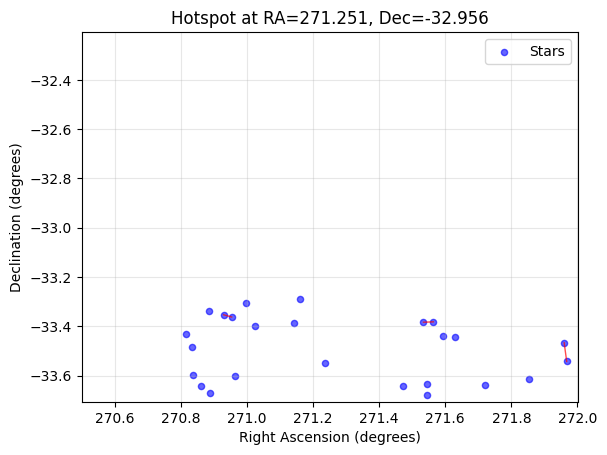

In [100]:
for ra, dec in hotspots:
    center_ra=ra
    center_dec=dec
    width=1.5
    # Filter data to include only stars within the specified region
    mask = ((data['ra'] > center_ra - width/2) & (data['ra'] < center_ra + width/2) &
            (data['dec'] > center_dec - width/2) & (data['dec'] < center_dec + width/2))
    region_data = data[mask]
    
    # Plot stars in the region
    plt.scatter(region_data['ra'], region_data['dec'], color='blue', alpha=0.6, s=20, label='Stars')
    
    # Plot binary pairs
    for pair in binary_pairs:
        star1 = data.iloc[pair[0]]
        star2 = data.iloc[pair[1]]
        plt.plot([star1['ra'], star2['ra']], [star1['dec'], star2['dec']],color='red', linewidth=1, alpha=0.7)
    
    plt.xlabel('Right Ascension (degrees)')
    plt.ylabel('Declination (degrees)')
    plt.title(f'Hotspot at RA={center_ra:.3f}, Dec={center_dec:.3f}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xlim(center_ra - width/2, center_ra + width/2)
    plt.ylim(center_dec - width/2, center_dec + width/2)
    plt.show()

# Nearest Neighbour

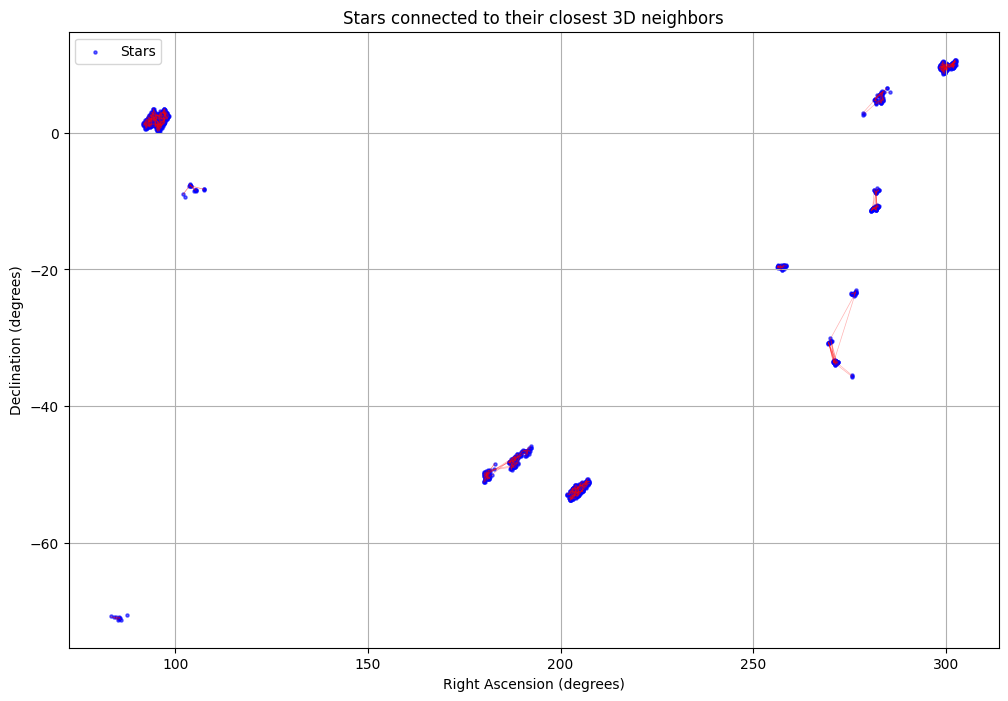

Total stars: 1100
Valid pairs found: 1085
Average 3D distance to nearest neighbor: 11.82 pc
Median 3D distance to nearest neighbor: 9.10 pc
Min 3D distance: 0.09 pc
Max 3D distance: 126.26 pc


In [101]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

def calculate_3d_distances(df):
    """Calculate 3D distances between stars using their coordinates and parallaxes"""
    # Convert to SkyCoord object
    coords = SkyCoord(
        ra=df['ra'].values*u.degree,
        dec=df['dec'].values*u.degree,
        distance=1000/df['parallax'].values*u.pc,
        frame='icrs'
    )
    
    # Get cartesian coordinates
    x = coords.cartesian.x.value
    y = coords.cartesian.y.value
    z = coords.cartesian.z.value
    
    return np.column_stack((x, y, z))

def find_nearest_neighbors(positions, max_distance=50):
    """Find nearest neighbors within maximum distance threshold"""
    # Fit NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(positions)
    distances, indices = nbrs.kneighbors(positions)
    
    # Filter pairs within max_distance
    valid_pairs = []
    for i in range(len(indices)):
        if distances[i][1] < max_distance:  # Check second nearest (first is self)
            valid_pairs.append((i, indices[i][1]))
    
    return valid_pairs, distances[:, 1]

def plot_star_connections(df, pairs, figsize=(12, 8)):
    """Plot stars and their connections"""
    plt.figure(figsize=figsize)
    
    # Plot all stars
    plt.scatter(df['ra'], df['dec'], c='blue', s=5, alpha=0.6, label='Stars')
    
    # Plot connections for valid pairs
    for i, j in pairs:
        plt.plot([df['ra'].iloc[i], df['ra'].iloc[j]], 
                [df['dec'].iloc[i], df['dec'].iloc[j]],
                'r-', linewidth=0.5, alpha=0.3)
    
    plt.xlabel('Right Ascension (degrees)')
    plt.ylabel('Declination (degrees)')
    plt.title('Stars connected to their closest 3D neighbors')
    plt.grid(True)
    plt.legend()
    plt.show()

def analyze_star_pairs(df, positions, pairs, distances):
    """Print analysis of star pairs"""
    print(f"Total stars: {len(df)}")
    print(f"Valid pairs found: {len(pairs)}")
    print(f"Average 3D distance to nearest neighbor: {np.mean(distances):.2f} pc")
    print(f"Median 3D distance to nearest neighbor: {np.median(distances):.2f} pc")
    print(f"Min 3D distance: {np.min(distances):.2f} pc")
    print(f"Max 3D distance: {np.max(distances):.2f} pc")

def main(data, max_distance=50):
    """Main function to process and visualize star pairs"""
    try:
        # Reset index to ensure consistent indexing
        data = data.reset_index(drop=True)
        
        # Calculate 3D positions
        positions = calculate_3d_distances(data)
        
        # Find nearest neighbors
        pairs, distances = find_nearest_neighbors(positions, max_distance)
        
        # Plot results
        plot_star_connections(data, pairs)
        
        # Print analysis
        analyze_star_pairs(data, positions, pairs, distances)
        
    except Exception as e:
        print(f"Error processing data: {str(e)}")

# Run the analysis
if __name__ == "__main__":
    # Assuming X_test_rfc_wbs is your dataset
    main(X_test_rfc_wbs, max_distance=50)  # Adjust max_distance as needed


---(ALL the work after this point was exploratory in nature...)---

# MOND Velocity

In [155]:
hdul = fits.open('1725606664466O-result.fits')
data = hdul[1].data
df = pd.DataFrame(data)
dt = df.copy()
dt['target'] = 0

In [156]:
hdul1 = fits.open('binary_catalog.fits')
data1 = hdul1[1].data
df1 = pd.DataFrame(data1)
df1.drop(columns=['solution_id1','solution_id2'], inplace=True)

In [158]:
df1.head()

,designation1,designation2,source_id1,source_id2,random_index1,random_index2,ref_epoch1,ref_epoch2,ra1,ra2,...,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type
0,Gaia EDR3 4089479022488044288,Gaia EDR3 4089479228603718016,4089479022488044288,4089479228603718016,908904198,616511068,2016.0,2016.0,276.689134,276.686031,...,9.669814,-5.199889,-5.181942,276.152316,276.151019,0.231443,0.265118,0.033700,29157.874130,MSMS
1,Gaia EDR3 4089398620737369088,Gaia EDR3 4089397757512204672,4089398620737369088,4089397757512204672,1629032774,1064802061,2016.0,2016.0,275.440174,275.359528,...,8.589557,-4.426596,-4.369445,274.984306,274.909793,-0.247530,-0.262487,0.075998,79160.521812,MS??
2,Gaia EDR3 4282156542430008576,Gaia EDR3 4282156546736543232,4282156542430008576,4282156546736543232,44746678,725518649,2016.0,2016.0,281.655078,281.655580,...,36.568503,3.208771,3.208777,283.132685,283.133349,27.605410,27.606356,0.001114,601.485454,MSMS
3,Gaia EDR3 4282175994356557568,Gaia EDR3 4282156679869051904,4282175994356557568,4282156679869051904,184989516,1300860338,2016.0,2016.0,281.609897,281.619018,...,36.561192,3.307368,3.245949,283.095236,283.093453,27.737868,27.619969,0.117909,152221.404738,MSMS
4,Gaia EDR3 4281938774703993728,Gaia EDR3 4281940557112176128,4281938774703993728,4281940557112176128,486504483,659077160,2016.0,2016.0,283.433822,283.429482,...,37.004314,1.425185,1.445556,285.069684,285.069073,26.986210,27.022726,0.036520,78347.192119,MSMS


## Filtering

In [163]:
df2 = df1[df1['sep_AU'] >= 10000]

## EDA

In [192]:
len(df1['source_id1'])

2668

In [196]:
print(len(df1['dr2_radial_velocity1'].unique()))
print(len(df1['dr2_radial_velocity2'].unique()))

283
23


In [194]:
len(df2['source_id1'])

1326

In [195]:
print(len(df2['dr2_radial_velocity1'].unique()))
print(len(df2['dr2_radial_velocity2'].unique()))

78
2


## Calculations

### A

In [202]:
v_arr = []
for index, row in df2.iterrows():
    d1 = 1000/row['parallax1']
    d2 = 1000/row['parallax2']
    vt1 = 4.74*0.001*d1*(( ((row['pmra1'])**2) + ((row['pmdec1'])**2) )**0.5)
    vt2 = 4.74*0.001*d2*(( ((row['pmra2'])**2) + ((row['pmdec2'])**2) )**0.5)
    vt = abs(vt1 - vt2)
    v = (((row['dr2_radial_velocity1'] - row['dr2_radial_velocity2'])**2) + ((vt)**2) )**0.5
    v_arr.append(vt)
df2 = df2.copy()
df2['Velocity'] = v_arr
df2['Velocity'].unique()

array([ 2.85385735,  2.02199952,  0.95848257, ..., 15.04123309,
        0.21506491,  0.12106772])

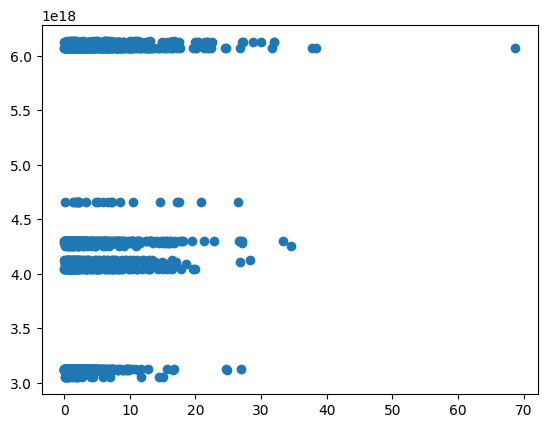

In [205]:
plt.scatter(df2['Velocity'],df2['source_id1'])

In [203]:
df2[df2['Velocity'].notnull()]

,designation1,designation2,source_id1,source_id2,random_index1,random_index2,ref_epoch1,ref_epoch2,ra1,ra2,...,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type,Velocity
0,Gaia EDR3 4089479022488044288,Gaia EDR3 4089479228603718016,4089479022488044288,4089479228603718016,908904198,616511068,2016.0,2016.0,276.689134,276.686031,...,-5.199889,-5.181942,276.152316,276.151019,0.231443,0.265118,0.033700,29157.874130,MSMS,2.853857
1,Gaia EDR3 4089398620737369088,Gaia EDR3 4089397757512204672,4089398620737369088,4089397757512204672,1629032774,1064802061,2016.0,2016.0,275.440174,275.359528,...,-4.426596,-4.369445,274.984306,274.909793,-0.247530,-0.262487,0.075998,79160.521812,MS??,2.022000
3,Gaia EDR3 4282175994356557568,Gaia EDR3 4282156679869051904,4282175994356557568,4282156679869051904,184989516,1300860338,2016.0,2016.0,281.609897,281.619018,...,3.307368,3.245949,283.095236,283.093453,27.737868,27.619969,0.117909,152221.404738,MSMS,0.958483
4,Gaia EDR3 4281938774703993728,Gaia EDR3 4281940557112176128,4281938774703993728,4281940557112176128,486504483,659077160,2016.0,2016.0,283.433822,283.429482,...,1.425185,1.445556,285.069684,285.069073,26.986210,27.022726,0.036520,78347.192119,MSMS,15.297626
5,Gaia EDR3 4089447097934046336,Gaia EDR3 4089448511033428352,4089447097934046336,4089448511033428352,858820216,1202728857,2016.0,2016.0,276.769382,276.748599,...,-5.460762,-5.421912,276.206087,276.189283,-0.197701,-0.149038,0.051483,130430.312670,MSMS,8.736009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,Gaia EDR3 6128817038887284736,Gaia EDR3 6128817038887328128,6128817038887284736,6128817038887328128,1693233828,1358408636,2016.0,2016.0,189.329718,189.339310,...,15.915265,15.932213,210.170276,210.166833,-38.733941,-38.716295,0.017850,43158.915895,MSMS,2.270316
2653,Gaia EDR3 3051153464395839616,Gaia EDR3 3051152914640060160,3051153464395839616,3051152914640060160,1359333144,451389148,2016.0,2016.0,103.720735,103.686682,...,-2.654549,-2.699125,105.788059,105.753252,-30.197855,-30.233268,0.046462,109897.756515,MSMS,1.714771
2656,Gaia EDR3 3051153533115308800,Gaia EDR3 3051153361316654592,3051153533115308800,3051153361316654592,157464768,1784802266,2016.0,2016.0,103.712732,103.672362,...,-2.653938,-2.703936,105.776800,105.734746,-30.181919,-30.217663,0.050977,135499.697715,MSMS,15.041233
2665,Gaia EDR3 3051430403887276544,Gaia EDR3 3051430262144713472,3051430403887276544,3051430262144713472,1525085291,544373804,2016.0,2016.0,107.302251,107.350174,...,0.186801,0.229099,109.964834,110.019255,-30.440446,-30.433474,0.047436,134122.704430,MSMS,0.215065


### B

In [206]:
v_arr = []
for index, row in df2.iterrows():
    d1 = 1000/row['parallax1']
    d2 = 1000/row['parallax2']
    d = ((d1**2)+ (d2)**2)**0.5
    u = ( (row['pmra1'] - row['pmra2'])**2 + (row['pmdec1'] - row['pmdec2'])**2 )**0.5
    vp = 4.74*0.001*u*d
    v_arr.append(vp)
df2 = df2.copy()
df2['Velocity'] = v_arr
df2['Velocity'].unique()

array([1.59958956, 2.06669019, 2.06083396, ..., 0.98607858, 0.98258276,
       2.11605975])

In [209]:
min(df2['sep_AU'])

10023.348538619364

In [210]:
min(df2['Velocity'])

0.009571101081580873

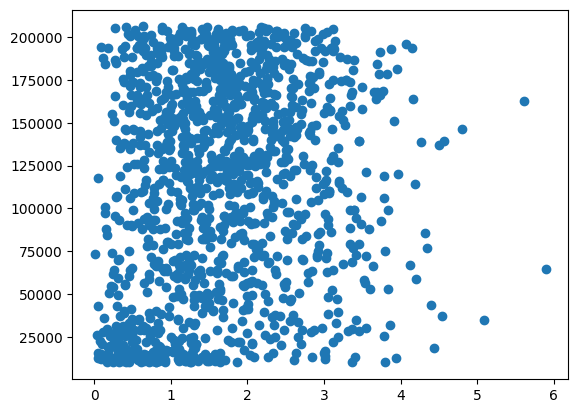

In [208]:
plt.scatter(df2['Velocity'],df2['sep_AU'])

# Estimating eccentricity

In [102]:
import numpy as np
from scipy.optimize import newton
from scipy.stats import truncnorm

# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
AU_TO_M = 1.496e11  # Conversion factor from AU to meters

# Functions for orbital mechanics calculations
def eccentric_anomaly(mean_anomaly, eccentricity):
    """
    Solve Kepler's equation for eccentric anomaly using Newton's method.
    """
    def kepler_eq(E):
        return E - eccentricity * np.sin(E) - mean_anomaly

    return newton(kepler_eq, mean_anomaly)

def true_anomaly(eccentric_anomaly, eccentricity):
    """
    Calculate true anomaly from eccentric anomaly and eccentricity.
    """
    return 2 * np.arctan2(
        np.sqrt(1 + eccentricity) * np.sin(eccentric_anomaly / 2),
        np.sqrt(1 - eccentricity) * np.cos(eccentric_anomaly / 2)
    )

def vr_angle(separation_vector, velocity_vector):
    """
    Calculate the v-r angle between separation and relative velocity vectors.
    """
    dot_product = np.dot(separation_vector, velocity_vector)
    magnitude_sep = np.linalg.norm(separation_vector)
    magnitude_vel = np.linalg.norm(velocity_vector)
    
    return np.arccos(dot_product / (magnitude_sep * magnitude_vel))

# Bayesian inference functions
def likelihood_vr_angle(eccentricity, vr_angle_obs):
    """
    Compute likelihood of observing a given v-r angle based on eccentricity.
    """
    # Simplified likelihood model based on orbital mechanics
    cos_vr = eccentricity * np.sin(vr_angle_obs) / np.sqrt(1 + eccentricity**2 + 2 * eccentricity * np.cos(vr_angle_obs))
    return cos_vr

def posterior_eccentricity(vr_angle_obs, prior_func, num_samples=1000):
    """
    Compute posterior distribution of eccentricity given observed v-r angle.
    """
    ecc_samples = np.linspace(0, 1, num_samples)
    likelihoods = likelihood_vr_angle(ecc_samples, vr_angle_obs)
    
    priors = prior_func(ecc_samples)
    
    posterior = likelihoods * priors
    posterior /= np.sum(posterior)  # Normalize
    
    return ecc_samples, posterior

# Prior function (power-law model)
def power_law_prior(eccentricities, alpha=1):
    """
    Compute power-law prior for eccentricities.
    """
    return (1 + alpha) * eccentricities**alpha

# Example usage
if __name__ == "__main__":
    
    # Example data: separation and velocity vectors in AU and km/s
    separation_vector = np.array([1.0, 0.5])  # Example separation vector (AU)
    velocity_vector = np.array([0.01, -0.02])  # Example velocity vector (km/s)
    
    # Convert units to SI
    separation_vector *= AU_TO_M
    velocity_vector *= 1000  # Convert km/s to m/s
    
    # Calculate v-r angle
    vr_angle_obs = vr_angle(separation_vector, velocity_vector)
    
    # Compute posterior distribution of eccentricities
    ecc_samples, posterior = posterior_eccentricity(vr_angle_obs, power_law_prior)
    
    # Print results
    print("Most probable eccentricity:", ecc_samples[np.argmax(posterior)])


Most probable eccentricity: 1.0


In [103]:
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

def get_vectors(star1, star2):
    # Create SkyCoord objects for both stars
    c1 = SkyCoord(ra=star1['ra']*u.deg, dec=star1['dec']*u.deg, 
                  distance=1000/star1['parallax']*u.pc, 
                  pm_ra_cosdec=star1['pmra']*u.mas/u.yr, 
                  pm_dec=star1['pmdec']*u.mas/u.yr)
    
    c2 = SkyCoord(ra=star2['ra']*u.deg, dec=star2['dec']*u.deg, 
                  distance=1000/star2['parallax']*u.pc, 
                  pm_ra_cosdec=star2['pmra']*u.mas/u.yr, 
                  pm_dec=star2['pmdec']*u.mas/u.yr)
    
    # Calculate separation vector
    separation_vector = c2.cartesian - c1.cartesian
    
    # Calculate velocity vector (only tangential component)
    v1 = c1.velocity.d_xyz
    v2 = c2.velocity.d_xyz
    velocity_vector = v2 - v1
    
    return separation_vector, velocity_vector

def calculate_eccentricity(star1, star2):
    separation_vector, velocity_vector = get_vectors(star1, star2)
    
    # Calculate v-r angle
    vr_angle = np.arccos(np.dot(separation_vector.xyz.value, velocity_vector.xyz.value) / 
                         (np.linalg.norm(separation_vector.xyz.value) * np.linalg.norm(velocity_vector.xyz.value)))
    
    # Here you would implement the Bayesian inference for eccentricity
    # For simplicity, let's use a placeholder function
    eccentricity = placeholder_eccentricity_calculation(vr_angle)
    
    return eccentricity

def placeholder_eccentricity_calculation(vr_angle):
    # This is a placeholder. In reality, you'd use Bayesian inference here.
    return np.abs(np.cos(vr_angle))  # This is not accurate, just for illustration

# Example usage
star1 = {
    'ra': 150.33, 'dec': -23.44, 'parallax': 50,  # mas
    'pmra': 100, 'pmdec': -50  # mas/yr
}
star2 = {
    'ra': 150.34, 'dec': -23.45, 'parallax': 49,  # mas
    'pmra': 101, 'pmdec': -51  # mas/yr
}

eccentricity = calculate_eccentricity(star1, star2)
print(f"Estimated eccentricity: {eccentricity}")

TypeError: Operation 'sub' is not supported when differentials are attached to a CartesianRepresentation.

# Ecc

In [111]:
hdul = fits.open('G-ML\data\wide_binary_eccentricity.fits')

In [112]:
hdul.info()

Filename: G-ML\data\wide_binary_eccentricity.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU   1295   1817594R x 15C   [K, D, D, K, D, D, D, D, D, D, D, D, D, D, D]   


In [113]:
e_dat = hdul[1].data
e_df = pd.DataFrame(e_dat)

In [114]:
e_df

,source_id1,ra1,dec1,source_id2,ra2,dec2,sep_AU,R_chance_align,vr_angle,vr_angle_error,dpm_sig,alpha,e,e0,e1
0,4282339100022417152,282.809431,5.692464,4282339095720590720,282.808858,5.688740,5500.025776,0.153096,25.577088,23.131449,2.476965,1.328263,0.98,0.682044,1.000000
1,4089436931798712576,276.313655,-23.550993,4089437344115586432,276.325631,-23.532504,31947.657718,1.106565,65.659759,34.070944,1.681661,1.340652,0.84,0.548200,0.979950
2,4282722760856124416,283.215217,5.949548,4282722790916299648,283.196166,5.946408,66239.350846,0.979752,74.281529,32.133161,1.783073,1.341375,0.80,0.513381,0.962281
3,4128188325747199104,256.870347,-20.235799,4128188325747198080,256.870166,-20.237197,3031.079698,0.000181,138.557272,7.653288,7.486427,1.310623,0.85,0.640093,0.970289
4,4281789722159307520,285.416255,5.741902,4281789717861282176,285.418511,5.736569,3066.565687,0.000106,133.164688,56.583001,1.012597,1.311124,0.94,0.591464,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817589,6056105102327466368,196.440923,-59.860668,6056104346377117824,196.441884,-59.860965,1139.652226,0.003537,56.040470,15.270586,3.752035,1.222995,0.78,0.526319,0.949159
1817590,6056106511076709632,196.194778,-59.864833,6056106476680697344,196.176001,-59.881155,65978.178621,1.086942,49.678816,34.028654,1.683751,1.341373,0.91,0.591476,1.000000
1817591,6056107301350695808,196.146487,-59.859357,6056106923357411840,196.146268,-59.859520,111.545452,0.000335,129.777945,15.839801,3.617203,0.128527,0.74,0.340029,0.921284
1817592,6056106992113048832,196.117589,-59.858806,6056106992113048960,196.116646,-59.859224,1914.039654,0.000075,108.287750,11.045798,5.187111,1.282891,0.67,0.420316,0.889114


In [115]:
e_df.columns

Index(['source_id1', 'ra1', 'dec1', 'source_id2', 'ra2', 'dec2', 'sep_AU',
       'R_chance_align', 'vr_angle', 'vr_angle_error', 'dpm_sig', 'alpha', 'e',
       'e0', 'e1'],
      dtype='object')